# Informacion del proyecto

### ASIGNATURA: MACHINE LEARNING

### NOMBRE PROYECTO: Weather AUS

### FECHA: 06/07/2023

### NOMBRE INTEGRANTES:
- Jair Molina
- Leandro Soto
- Jorge Carmona

### **Contexto**

* El objetivo de este informe es analizar el conjunto de datos de Weather en Australia utilizando técnicas de Data Science para realizar un análisis exploratorio, transformación de datos y construcción de modelos predictivos. El contexto del problema se centra en comprender y predecir los patrones climáticos en Australia con el fin de mejorar la toma de decisiones relacionadas con el clima y sus impactos en diversas industrias, como la agricultura, el turismo y la gestión de recursos naturales.
El análisis exploratorio de datos es crucial para comprender la estructura y las características del conjunto de datos. Nos permitirá identificar patrones, relaciones y tendencias ocultas, así como detectar valores atípicos o datos faltantes. Esto nos brindará una visión general del clima en Australia, su variabilidad y posibles factores que lo afectan.
La transformación de datos desempeñará un papel fundamental en la preparación del conjunto de datos para su posterior análisis y modelado. Esto puede incluir la limpieza y eliminación de datos erróneos o inconsistentes, la normalización de variables, la codificación de variables categóricas y la manipulación de fechas, entre otros. La calidad y la adecuada preparación de los datos son esenciales para obtener resultados precisos y confiables.
Los modelos predictivos nos permitirán hacer inferencias sobre futuros eventos climáticos en Australia. Utilizando técnicas de aprendizaje automático y análisis estadístico, podremos construir modelos que capturen los patrones históricos y las relaciones entre las variables climáticas. Estos modelos podrán predecir, por ejemplo, la probabilidad de lluvia, las temperaturas extremas o los cambios estacionales en diferentes regiones de Australia. Estas predicciones serán valiosas para tomar decisiones informadas y planificar actividades relacionadas con el clima.


### Entendimiento del negocio

El problema que queremos abordar es predecir si lloverá o no en Australia mañana. Esta pregunta es relevante para diversas industrias y actividades, como la agricultura, el turismo, el sector de seguros y la planificación de eventos al aire libre.
Tener una predicción precisa sobre si lloverá o no puede ayudar a tomar decisiones informadas y anticipar posibles impactos del clima.
Los objetivos comerciales relacionados con este problema pueden incluir:

Mejorar la planificación de actividades al aire libre: Al conocer con anticipación si lloverá o no, se pueden tomar decisiones adecuadas sobre la realización de eventos al aire libre, como festivales, conciertos o deportes.
Optimizar la gestión de recursos en la agricultura: La predicción precisa de la lluvia puede ayudar a los agricultores a planificar la irrigación, el cultivo y la cosecha de manera más eficiente, maximizando la productividad y minimizando el desperdicio de recursos.

### Glosario de datos

* Fecha: Fecha de la observación
* Ubicación: Ubicación de la estación meteorológica
* MinTemp: Temperatura mínima en grados Celsius
* MaxTemp: Temperatura máxima en grados Celsius
* Lluvia: Cantidad de lluvia registrada ese día en mm.
* Evaporacion: Evaporación (mm) en 24 horas
* Sol: Número de horas de sol brillante en el día
* DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.
* VelRafaga: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.
* Dir9am: Dirección del viento a las 9am
* Dir3pm: Dirección del viento a las 3pm
* Vel9am: Velocidad (km/hr) del viento a las 9am
* Vel3pm: Velocidad (km/hr) del viento a las 3pm
* Hum9am: Porcentaje de humedad a las 9am
* Hum3pm: Porcentaje de humedad a las 3pm
* Pres9am: Presión atmosférica (hpa) a nivel del mar a las 9am
* Pre3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm
* Nub9am: Fracción del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0
indica cielo totalmente despejado y 8, cielo totalmente cubierto.

* Nub3pm: Fracción del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0
indica cielo totalmente despejado y 8, cielo totalmente cubierto.

* Temp9am: Temperatura en grados celsius a las 9am
* Temp3pm: Temperatura en grados celsius a las 3pm
* LluviaHoy: Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede
1 mm. y 0 si no.

* RISK_MM: La cantidad de lluvia. Una especie de medida del "riesgo".
LluviaMan Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.


# Carga de datos y librerias

In [1]:
# Instalamos Dependencias
!pip install geopy
!pip install folium

Durante el pasado procesamos carga de algunas librerías la cuales nos van a ayudar a mostrar los datos mediante mapas (geopy y folium) para así dar una representación geográfica de ciertas localidades

In [2]:
# Cargar librerias
import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from IPython.display import clear_output
from IPython.display import display, HTML
from statistics import mode, multimode
import statistics
clear_output()

Cargamos las librerias que nos van a ser utiles para poder obtener amedidas estadisticas y realizar graficos

In [3]:
!wget https://www.dropbox.com/s/9ljw60i6ae51iad/weatherAUS.csv
data = pd.read_csv('weatherAUS.csv', sep=",")
clear_output()
print('-' * 50)
print('✓ Data Cargada ✓')
print('-' * 50)
print("El dataframe tiene {} filas y {} columnas".format(data.shape[0], data.shape[1]))
print('-' * 50)

--------------------------------------------------
✓ Data Cargada ✓
--------------------------------------------------
El dataframe tiene 142193 filas y 24 columnas
--------------------------------------------------


Lo primero que vamos a realizar es una vista rápida de los datos para así que tipo de datos están presentes en la data

# Que datos tenemos

In [4]:
null_counts = data.isnull().sum()
total_null_count = null_counts.sum()

display(HTML(f'<font color="white"><b><font size="2"> La  total de valorcantidades nulos en columnas con nulos es: {total_null_count}</font></b></font>'))

null_counts_filtered = null_counts
dtypes_filtered = data[null_counts_filtered.index].dtypes
result = pd.concat([null_counts_filtered, dtypes_filtered], axis=1)
result.columns = ['<span style="color:red;font-weight:bold;">Valores Nulos</span>',                   '<span style="color:red;font-weight:bold;">Tipo de Dato</span>']

result = result[['<span style="color:red;font-weight:bold;">Tipo de Dato</span>']]

display(HTML(result.to_html(escape=False)))


,Tipo de Dato
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


Durante este paso nos percatamos la gran variedad de tipos de valores en las diferentes columnas, también mostramos la cantidad de nulos presentes en cada columna, esto es importante dado que más adelante vamos a realizar una limpieza de nuestros datos para ver si ase encuentra distribuidos de buena manera.

Dado a la gran cantidad de columna vamos a mostrar los relevantes para el análisis y así tener una vista más clara de la información presente en el dataset.

Tipos de variables que se encuentran
* Date: Cualitativa ordinal
* Location: Categorico nominal
* MinTemp:	Cuantitativo continuo
* MaxTemp:	Cuantitativo continuo
* Rainfall:	Cuantitativo continuo
* Evaporation:	Cuantitativo continuo
* Sunshine:	Cuantitativo
* WindGustDir:	Categorico nominal
* WindGustSpeed:	Cuantitativo continuo
* WindDir9am:	Categorico nominal
* WindDir3pm:	Categorico nominal
* WindSpeed9am:	Cuantitativo continuo
* WindSpeed3pm:	Cuantitativo continuo
* Humidity9am:	Cuantitativo continuo
* Humidity3pm:	Cuantitativo continuo
* Pressure9am:	Cuantitativo continuo
* Pressure3pm:	Cuantitativo continuo
* Cloud9am:	Cuantitativo continuo
* Cloud3pm:	Cuantitativo continuo
* Temp9am:	Cuantitativo continuo
* Temp3pm:	Cuantitativo continuo
* RainToday:	Categorico nominal
* RISK_MM:	Cuantitativo continuo
* RainTomorrow:	Categorico nominal

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


Gracias a la sentencia anterior podemos ver de manera rápida de lo que vamos a manejar en este análisis, en este caso se muestra los rangos intercuartílicos de cada columna cuantitativa, la desviación estándar, también podemos ver cuantas filas hay en cuada variable y también la media, esto nos ayudara más adelante para saber si nuestros datos están distribuidos de buena manera.

In [6]:
#verificar los datos unicos
encabezado='Verificando los datos únicos'
print(encabezado)
print('-'*len(encabezado))
print('Mapas: ',data['RainTomorrow'].unique())
#print('Equipos: ',data['Team'].unique())

Verificando los datos únicos
----------------------------
Mapas:  ['No' 'Yes']


# Preparación y limpieza de datos



Durante esta etapa vamos a realizar la limpieza de las columnas, ya que alguna de estas pueden tener nulos presentes, también puede que en la misma columna haya variables de diferente tipo, generando así una mal representación en sí de la columna, lo cual podría afectar a futuro si es que queremos aplicar estos datos aún modelo predictivo.

In [7]:
# Agrupar los datos por ubicación y calcular la media de las columnas correspondientes para cada grupo
grouped = data.groupby('Location')[['MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']].mean()

# Reemplazar los valores nulos por la media correspondiente en cada grupo
for index, row in data.iterrows():
    if pd.isnull(row['MinTemp']):
        data.at[index, 'MinTemp'] = grouped.loc[row['Location']]['MinTemp']
    if pd.isnull(row['MaxTemp']):
        data.at[index, 'MaxTemp'] = grouped.loc[row['Location']]['MaxTemp']
    if pd.isnull(row['WindSpeed9am']):
        data.at[index, 'WindSpeed9am'] = grouped.loc[row['Location']]['WindSpeed9am']
    if pd.isnull(row['WindSpeed3pm']):
        data.at[index, 'WindSpeed3pm'] = grouped.loc[row['Location']]['WindSpeed3pm']
    if pd.isnull(row['Humidity9am']):
        data.at[index, 'Humidity9am'] = grouped.loc[row['Location']]['Humidity9am']
    if pd.isnull(row['Humidity3pm']):
        data.at[index, 'Humidity3pm'] = grouped.loc[row['Location']]['Humidity3pm']
    if pd.isnull(row['Pressure9am']):
        data.at[index, 'Pressure9am'] = grouped.loc[row['Location']]['Pressure9am']
    if pd.isnull(row['Pressure3pm']):
        data.at[index, 'Pressure3pm'] = grouped.loc[row['Location']]['Pressure3pm']


In [8]:
# Agrupar los datos por ubicación y calcular la mediana de las columnas 'Sunshine', 'Evaporation', 'Cloud9am' y 'Cloud3pm' para cada grupo
grouped = data.groupby('Location')[['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','WindGustSpeed']].median()

# Reemplazar los valores nulos por la mediana correspondiente en cada grupo
for index, row in data.iterrows():
    if pd.isnull(row['Sunshine']):
        data.at[index, 'Sunshine'] = grouped.loc[row['Location']]['Sunshine']
    if pd.isnull(row['Evaporation']):
        data.at[index, 'Evaporation'] = grouped.loc[row['Location']]['Evaporation']
    if pd.isnull(row['Cloud9am']):
        data.at[index, 'Cloud9am'] = grouped.loc[row['Location']]['Cloud9am']
    if pd.isnull(row['Cloud3pm']):
        data.at[index, 'Cloud3pm'] = grouped.loc[row['Location']]['Cloud3pm']
    if pd.isnull(row['Temp9am']):
        data.at[index, 'Temp9am'] = grouped.loc[row['Location']]['Temp9am']
    if pd.isnull(row['Temp3pm']):
        data.at[index, 'Temp3pm'] = grouped.loc[row['Location']]['Temp3pm']
    if pd.isnull(row['WindGustSpeed']):
        data.at[index, 'WindGustSpeed'] = grouped.loc[row['Location']]['WindGustSpeed']
    if pd.isnull(row['Cloud3pm']):
        data.at[index, 'Cloud3pm'] = grouped.loc[row['Location']]['Cloud3pm']
    if pd.isnull(row['Cloud9am']):
        data.at[index, 'Cloud9am'] = grouped.loc[row['Location']]['Cloud9am']

Generamos un código para poder cambiar los Nulos a la media de la temperatura, así se debería hacer con todas las columnas numéricas, para que los datos sean representativos, por ahora, así mismo con las de Velocidad y Humedad del tiempo para las 9 am y 3 pm esto lo definimos, ya que la distribución de los datos es uniforme

Generamos un código que saca la Media de Sunshine y Evaporation, ¿por qué la media? Por que nuestros datos tienen una distribución asimétrica

In [9]:
#Limpieza para los datos
mask = ~np.isfinite(data['Rainfall'])
data['Rainfall'][mask] = np.nan
data['Rainfall'] = data['Rainfall'].fillna(0)

data['RainToday'] = data['RainToday'].fillna('No')
#Cambio de la variable Date que es tipo Object a dateTime
data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].dtype)


data['WindGustDir'] = data['WindGustDir'].fillna('Undefined')
data['WindDir9am'] = data['WindDir9am'].fillna('Undefined')
data['WindDir3pm'] = data['WindDir3pm'].fillna('Undefined')


data['Evaporation'] = data['Evaporation'].fillna(0)
data['Sunshine'] = data['Evaporation'].fillna(0)
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(0)
data['Pressure9am'] = data['Pressure9am'].fillna(0)
data['Pressure3pm'] = data['Pressure3pm'].fillna(0)
data['Cloud9am'] = data['Cloud9am'].fillna(0)
data['Cloud3pm'] = data['Cloud3pm'].fillna(0)

clear_output()

Creamos una limpieza para el dataset, cambiando de tipo de datos los que no corresponden

Para la columna RainToday y Rainfall, según nuestro análisis decidimos llenarlo con 0 y No, Ya que estas columnas tienen toda la relación entre ellas, también son pocas las filas con nulos, y esto no influiría tanto en el análisis, también según este, Australia no es un lugar donde llueva mucho

También lo que revisamos fue que algunas ciudades no presentaban registro alguno de las columnas como por ejemplo la evaporación, las horas de sol, la velocidad en ráfagas de viento y las variables relacionadas con la presencia de nubes, por ende como equipo tomamos la decisión de rellenarlos con ceros, ya que al no presentar ningún valor esto podría afectar a la data dado que el código utilizado en donde sé esa la media y la mediana solo aplica a ciudades en donde hay registros de estas variables.

Para las columnas de dirección de viento, los nulos los definiremos como Indefinido, ya que no tenemos

In [10]:
null_counts = data.isnull().sum()
total_null_count = null_counts.sum()

display(HTML(f'<font color="white"><b><font size="2"> La cantidad total de valores nulos en columnas con nulos es: {total_null_count}</font></b></font>'))

null_counts_filtered = null_counts
dtypes_filtered = data[null_counts_filtered.index].dtypes
result = pd.concat([null_counts_filtered, dtypes_filtered], axis=1)
result.columns = ['<span style="color:red;font-weight:bold;">Valores Nulos</span>',                   '<span style="color:red;font-weight:bold;">Tipo de Dato</span>']

display(HTML(result.to_html(escape=False)))



,Valores Nulos,Tipo de Dato
Date,0,datetime64[ns]
Location,0,object
MinTemp,0,float64
MaxTemp,0,float64
Rainfall,0,float64
Evaporation,0,float64
Sunshine,0,float64
WindGustDir,0,object
WindGustSpeed,0,float64
WindDir9am,0,object


Durante el proceso anterior realizamos la clasificación de cada variable dependiendo sé su tipo, para así más adelante poder elegirlos con mayor facilidad dependiendo para lo que queramos utilizar.

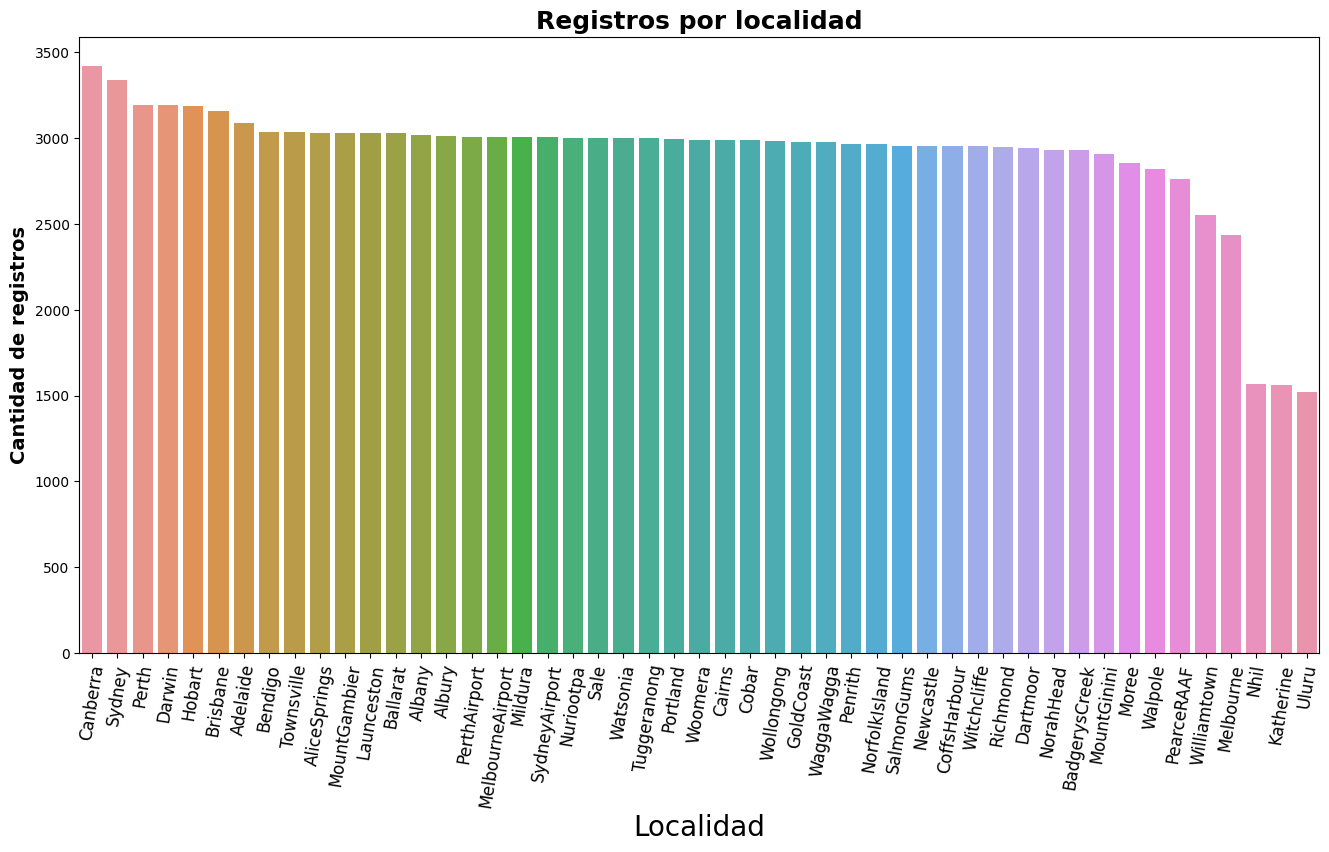

In [11]:
# Contar la cantidad de registros por localidad
counts = data['Location'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(16,8))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Localidad', fontsize=20)
plt.xticks(rotation=81, fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=14, fontweight="bold")
plt.title(r'Registros por localidad', fontsize=18, fontweight="bold")
plt.show()

En este gráfico se puede ver la cantidad de datos por cada ciudad, podemos apreciar que hay tres ciudades que tienen menos de 2000 datos y dos que se escapan de la media de datos.

# Medidas estadisticas de cada variable

### Variables cuantitativas

In [12]:
# Eliminar filas con valores NaN o nulos en las columnas de interés
columns_of_interest = [ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
data_clean = data.dropna(subset=columns_of_interest)
# Calcular promedio, mediana, moda, varianza, desviacion estandar y coeficiente de variacion en las columnas limpias
for feature in columns_of_interest:
    moda2 = statistics.multimode(data_clean[feature])
    display(HTML(f'<font color="red"><b><font size="">- {feature}</font></b></font>'))
    print("{0:<9} de {1:<13} : {2:.2f}".format("Promedio", feature, np.mean(data_clean[feature])))
    print("{0:<9} de {1:<13} : {2:.2f}".format("Mediana", feature, np.median(data_clean[feature])))
    print("{0:<9} de {1:<13} : {2}".format("Moda", feature, ", ".join(str(x) for x in moda2)))
    print("{0:<9} de {1:<13} : {2:.2f}".format("Varianza", feature, np.var(data_clean[feature], ddof=1)))
    print("{0:<9} de {1:<13} : {2:.2f}".format("Desv. Est.", feature, np.std(data_clean[feature], ddof=1)))
    print("{0:<9} de {1:<13} : {2:.2f}%".format("Coef. Var.", feature, np.std(data_clean[feature], ddof=1) / np.mean(data_clean[feature]) * 100))

Promedio  de MinTemp       : 12.19
Mediana   de MinTemp       : 12.00
Moda      de MinTemp       : 9.6, 11.0
Varianza  de MinTemp       : 40.88
Desv. Est. de MinTemp       : 6.39
Coef. Var. de MinTemp       : 52.46%


Promedio  de MaxTemp       : 23.23
Mediana   de MaxTemp       : 22.60
Moda      de MaxTemp       : 20.0
Varianza  de MaxTemp       : 50.59
Desv. Est. de MaxTemp       : 7.11
Coef. Var. de MaxTemp       : 30.62%


Promedio  de Rainfall      : 2.33
Mediana   de Rainfall      : 0.00
Moda      de Rainfall      : 0.0
Varianza  de Rainfall      : 71.00
Desv. Est. de Rainfall      : 8.43
Coef. Var. de Rainfall      : 362.16%


Promedio  de Evaporation   : 3.64
Mediana   de Evaporation   : 3.10
Moda      de Evaporation   : 0.0
Varianza  de Evaporation   : 16.33
Desv. Est. de Evaporation   : 4.04
Coef. Var. de Evaporation   : 111.07%


Promedio  de Sunshine      : 3.64
Mediana   de Sunshine      : 3.10
Moda      de Sunshine      : 0.0
Varianza  de Sunshine      : 16.33
Desv. Est. de Sunshine      : 4.04
Coef. Var. de Sunshine      : 111.07%


Promedio  de WindGustSpeed : 38.30
Mediana   de WindGustSpeed : 37.00
Moda      de WindGustSpeed : 39.0
Varianza  de WindGustSpeed : 237.08
Desv. Est. de WindGustSpeed : 15.40
Coef. Var. de WindGustSpeed : 40.20%


Promedio  de WindSpeed9am  : 13.99
Mediana   de WindSpeed9am  : 13.00
Moda      de WindSpeed9am  : 9.0
Varianza  de WindSpeed9am  : 78.52
Desv. Est. de WindSpeed9am  : 8.86
Coef. Var. de WindSpeed9am  : 63.34%


Promedio  de WindSpeed3pm  : 18.59
Mediana   de WindSpeed3pm  : 19.00
Moda      de WindSpeed3pm  : 13.0
Varianza  de WindSpeed3pm  : 76.52
Desv. Est. de WindSpeed3pm  : 8.75
Coef. Var. de WindSpeed3pm  : 47.05%


Promedio  de Humidity9am   : 68.90
Mediana   de Humidity9am   : 70.00
Moda      de Humidity9am   : 99.0
Varianza  de Humidity9am   : 359.38
Desv. Est. de Humidity9am   : 18.96
Coef. Var. de Humidity9am   : 27.51%


Promedio  de Humidity3pm   : 51.59
Mediana   de Humidity3pm   : 52.00
Moda      de Humidity3pm   : 52.0
Varianza  de Humidity3pm   : 424.83
Desv. Est. de Humidity3pm   : 20.61
Coef. Var. de Humidity3pm   : 39.96%


Promedio  de Pressure9am   : 933.33
Mediana   de Pressure9am   : 1016.80
Moda      de Pressure9am   : 0.0
Varianza  de Pressure9am   : 78738.69
Desv. Est. de Pressure9am   : 280.60
Coef. Var. de Pressure9am   : 30.06%


Promedio  de Pressure3pm   : 931.13
Mediana   de Pressure3pm   : 1014.40
Moda      de Pressure3pm   : 0.0
Varianza  de Pressure3pm   : 78368.33
Desv. Est. de Pressure3pm   : 279.94
Coef. Var. de Pressure3pm   : 30.06%


Promedio  de Temp9am       : 16.96
Mediana   de Temp9am       : 16.70
Moda      de Temp9am       : 18.4
Varianza  de Temp9am       : 42.21
Desv. Est. de Temp9am       : 6.50
Coef. Var. de Temp9am       : 38.30%


Promedio  de Temp3pm       : 21.71
Mediana   de Temp3pm       : 21.20
Moda      de Temp3pm       : 21.9
Varianza  de Temp3pm       : 48.22
Desv. Est. de Temp3pm       : 6.94
Coef. Var. de Temp3pm       : 31.98%


Promedio  de RISK_MM       : 2.36
Mediana   de RISK_MM       : 0.00
Moda      de RISK_MM       : 0.0
Varianza  de RISK_MM       : 71.88
Desv. Est. de RISK_MM       : 8.48
Coef. Var. de RISK_MM       : 359.13%


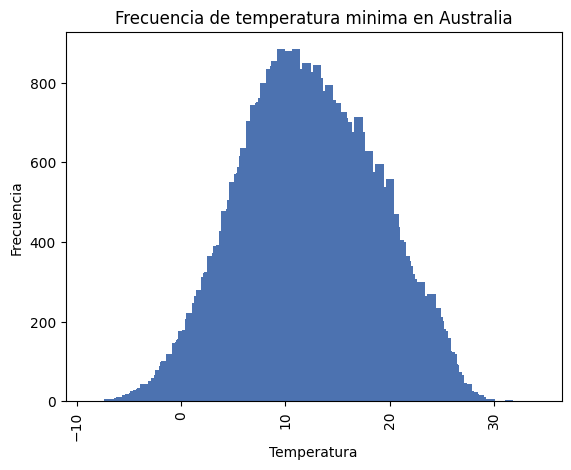

In [13]:
# Calcular la frecuencia de MinTemp
frecuenciaMinTemp = data['MinTemp'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuenciaMinTemp.index, frecuenciaMinTemp.values, color='#4C72B0')

# Agregar etiquetas al gráfico
plt.title('Frecuencia de temperatura minima en Australia')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

* Desde este gráfico podemos extraer la siguiente información estadística acerca de la variable MinTemp la cual indica la temperatura mínima presente de manera general en Australia, donde los valores más frecuentes es decir la moda de los datos es entre 9.6 grados y 11 grados los cuales nos pueden indicar la temperatura mínima presente durante ese año en Australia, también tenemos la mediana de los datos la cual nos indica que esta aproxima a los 12 grados esto nos indica el valor central del conjunto de datos.

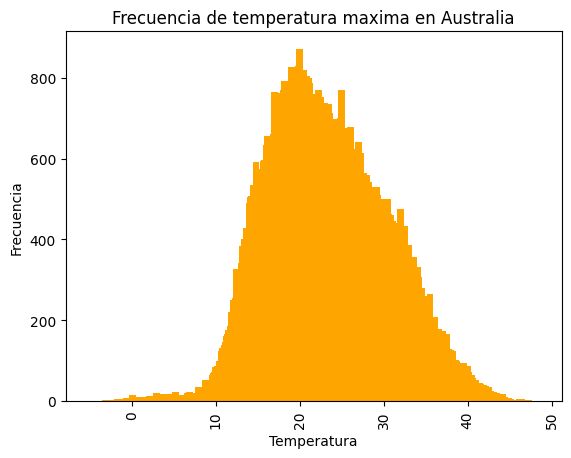

In [14]:
# Calcular la frecuencia de MaxTemp
frecuencia_absoluta = data['MaxTemp'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencia_absoluta.index, frecuencia_absoluta.values, color='orange')

# Agregar etiquetas al gráfico
plt.title('Frecuencia de temperatura maxima en Australia')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

* Desde este gráfico podemos extraer la siguiente información estadística acerca de la variable MaxTemp la cual indica la temperatura mínima presente de manera general en Australia, donde los valores más frecuentes es decir la moda de los datos es entre 20 grados los cuales nos pueden indicar la temperatura maxima presente durante ese año en Australia, también tenemos la mediana de los datos la cual nos indica la mitad de los datos, que esta aproxima a los 22.6.

Es MUY IMPORTANTE saber que estos datos NO SON REPRESENTATIVOS, como se comentó más arriba esto se debe hacer para cada Locación por separado, más abajo podemos ver una muestra de como esto sería correcto, con las Columnas MinTemp y MaxTemp

### Variables cualitativas

In [15]:
#Frecuencia absoluta
frecuencia_absoluta = data['Location'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['Location'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data['Location'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que más se repite es/son: ',moda2)

                  Frecuencia absoluta  Frecuencia relativa
Canberra                         3418             0.024038
Sydney                           3337             0.023468
Perth                            3193             0.022455
Darwin                           3192             0.022448
Hobart                           3188             0.022420
Brisbane                         3161             0.022230
Adelaide                         3090             0.021731
Bendigo                          3034             0.021337
Townsville                       3033             0.021330
AliceSprings                     3031             0.021316
MountGambier                     3030             0.021309
Launceston                       3028             0.021295
Ballarat                         3028             0.021295
Albany                           3016             0.021211
Albury                           3011             0.021175
PerthAirport                     3009             0.0211

La moda es el valor que aparece con mayor frecuencia en un conjunto de datos, en este caso la moda es 'Canberra', lo que significa que la ciudad de Canberra es la que más veces aparece en la lista y es la ciudad con la mayor frecuencia absoluta de todas las ciudades mencionadas en los datos. También podemos interpretar que las ciudades que le siguen a Canberra en frecuencia absoluta y relativa son: Sydney, Perth, Darwin, Hobart, Brisbane, Adelaide, Bendigo y Townsville, por lo que podemos decir que estas ciudades son las más mencionadas en los datos. Además, podemos observar que todas las ciudades tienen una frecuencia relativa cercana, lo que indica que no hay una ciudad que destaque significativamente sobre las demás en términos de menciones.

In [16]:
#VARIABLE WindDir9am

#Frecuencia absoluta
frecuencia_absoluta = data['WindDir9am'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['WindDir9am'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data['WindDir9am'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que más se repite es/son: ',moda2)

           Frecuencia absoluta  Frecuencia relativa
N                        11393             0.080123
Undefined                10013             0.070418
SE                        9162             0.064434
E                         9024             0.063463
SSE                       8966             0.063055
NW                        8552             0.060144
S                         8493             0.059729
W                         8260             0.058090
SW                        8237             0.057928
NNE                       7948             0.055896
NNW                       7840             0.055136
ENE                       7735             0.054398
ESE                       7558             0.053153
NE                        7527             0.052935
SSW                       7448             0.052380
WNW                       7194             0.050593
WSW                       6843             0.048125
 
El valor que más se repite es/son:  ['N']


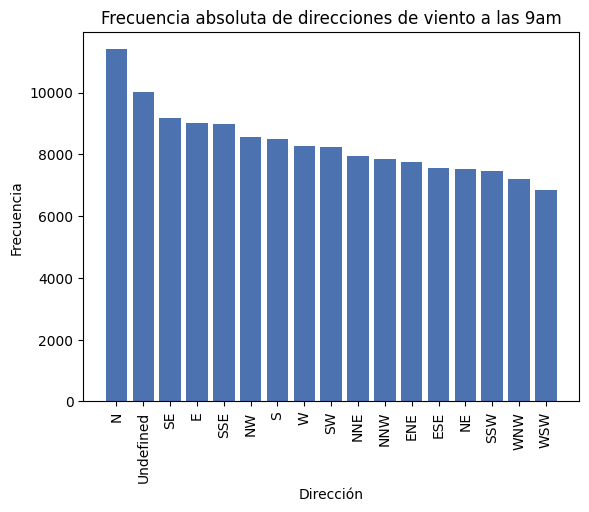

In [17]:
# Calcular la frecuencia absoluta de las direcciones de viento a las 9am
frecuencia_absoluta = data['WindDir9am'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencia_absoluta.index, frecuencia_absoluta.values, color='#4C72B0')

# Agregar etiquetas al gráfico
plt.title('Frecuencia absoluta de direcciones de viento a las 9am')
plt.xlabel('Dirección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

El valor que más se repite en los datos es 'N', lo que indica que la dirección Norte es la más frecuente en el conjunto de datos. La frecuencia absoluta de 'N' es de 11393, lo que representa el 8.01% de todas las observaciones, seguida de 'Undefined' con una frecuencia absoluta de 10013 y una frecuencia relativa del 7.04%.

Es importante tener en cuenta que estos datos podrían referirse a la dirección del viento, ya que las direcciones mencionadas son las abreviaturas de las distintas orientaciones cardinales. Por lo tanto, podemos inferir que en las observaciones se ha registrado con mayor frecuencia que el viento proviene del Norte.

Albury | BadgerysCreek | Cobar | CoffsHarbour | Moree | Newcastle | NorahHead |
NorfolkIsland | Penrith | Richmond | Sydney | SydneyAirport |
WaggaWagga | Williamtown | Wollongong | Canberra | Tuggeranong |
MountGinini | Ballarat | Bendigo | Sale | MelbourneAirport |
Melbourne | Mildura | Nhil | Portland | Uluru
Watsonia | Dartmoor | Brisbane | Cairns | GoldCoast | Townsville |
Adelaide | MountGambier | Nuriootpa | Woomera | Albany |
Witchcliffe | PearceRAAF | PerthAirport | Perth | SalmonGums |
Walpole | Hobart | Launceston | AliceSprings | Darwin | Katherine |

In [18]:
city = input('Ingresa una ubicación: ')
city = city.replace(' ', '')  # Eliminar los espacios en blanco
print('Su ubicación es: ' + city)


Ingresa una ubicación: Albury
Su ubicación es: Albury


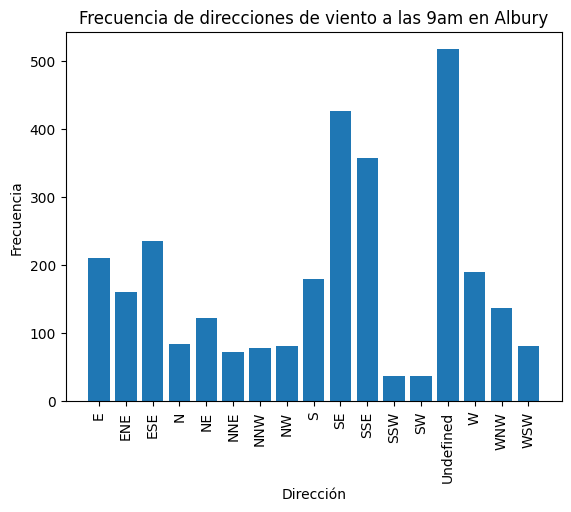

In [19]:
# Seleccionar los datos solo para la ciudad ingresada por el usuario
data_city = data[data['Location'] == city]

# Agrupar los datos por dirección de viento a las 9am y contar las frecuencias absolutas
grouped = data_city.groupby('WindDir9am').size().reset_index(name='counts')

# Crear un gráfico de barras
plt.bar(grouped['WindDir9am'], grouped['counts'])

# Agregar etiquetas al gráfico
plt.title(f'Frecuencia de direcciones de viento a las 9am en {city}')
plt.xlabel('Dirección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este caso decidimos ser un poco más específicos y no generalizar para todo el país, sino por localidad, ya que al ser un país con mucha variación geológica este tiende afectar de manera diferente en cada lugar.

In [20]:
#Frecuencia absoluta
frecuencia_absoluta = data['WindDir3pm'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['WindDir3pm'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data['WindDir3pm'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que más se repite es/son: ',moda2)

           Frecuencia absoluta  Frecuencia relativa
SE                       10663             0.074990
W                         9911             0.069701
S                         9598             0.067500
WSW                       9329             0.065608
SW                        9182             0.064574
SSE                       9142             0.064293
N                         8667             0.060952
WNW                       8656             0.060875
NW                        8468             0.059553
ESE                       8382             0.058948
E                         8342             0.058667
NE                        8164             0.057415
SSW                       8010             0.056332
NNW                       7733             0.054384
ENE                       7724             0.054321
NNE                       6444             0.045319
Undefined                 3778             0.026570
 
El valor que más se repite es/son:  ['SE']


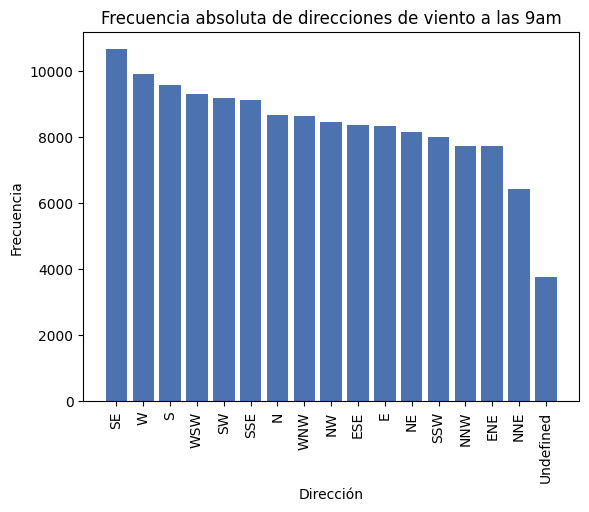

In [21]:
# Calcular la frecuencia absoluta de las direcciones de viento a las 9am
frecuencia_absoluta = data['WindDir3pm'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencia_absoluta.index, frecuencia_absoluta.values, color='#4C72B0')

# Agregar etiquetas al gráfico
plt.title('Frecuencia absoluta de direcciones de viento a las 9am')
plt.xlabel('Dirección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Para calcular la moda en este caso, necesitamos encontrar el valor que más se repite en la lista de direcciones de viento. De acuerdo a la tabla, el valor que más se repite es "SE", con una frecuencia absoluta de 10663 y una frecuencia relativa de 0.074990.

Por lo tanto, la moda en este conjunto de datos es "SE".

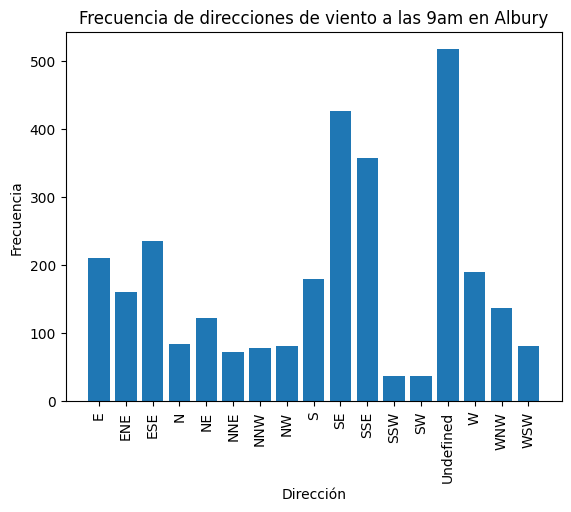

In [22]:
# Seleccionar los datos solo para la ciudad ingresada por el usuario
data_city = data[data['Location'] == city]

# Agrupar los datos por dirección de viento a las 9am y contar las frecuencias absolutas
grouped = data_city.groupby('WindDir9am').size().reset_index(name='counts')

# Crear un gráfico de barras
plt.bar(grouped['WindDir9am'], grouped['counts'])

# Agregar etiquetas al gráfico
plt.title(f'Frecuencia de direcciones de viento a las 9am en {city}')
plt.xlabel('Dirección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este caso decidimos ser un poco más específicos y no generalizar para todo el país, sino por localidad, ya que al ser un país con mucha variación geológica este tiende afectar de manera diferente en cada lugar.

In [23]:
#VARIABLE WindGustDir

#Frecuencia absoluta
frecuencia_absoluta = data['WindGustDir'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['WindGustDir'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data['WindGustDir'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que más se repite es/son:  ',moda2)

           Frecuencia absoluta  Frecuencia relativa
W                         9780             0.068780
Undefined                 9330             0.065615
SE                        9309             0.065467
E                         9071             0.063794
N                         9033             0.063526
SSE                       8993             0.063245
S                         8949             0.062936
WSW                       8901             0.062598
SW                        8797             0.061867
SSW                       8610             0.060552
WNW                       8066             0.056726
NW                        8003             0.056283
ENE                       7992             0.056205
ESE                       7305             0.051374
NE                        7060             0.049651
NNW                       6561             0.046142
NNE                       6433             0.045241
 
El valor que más se repite es/son:   ['W']


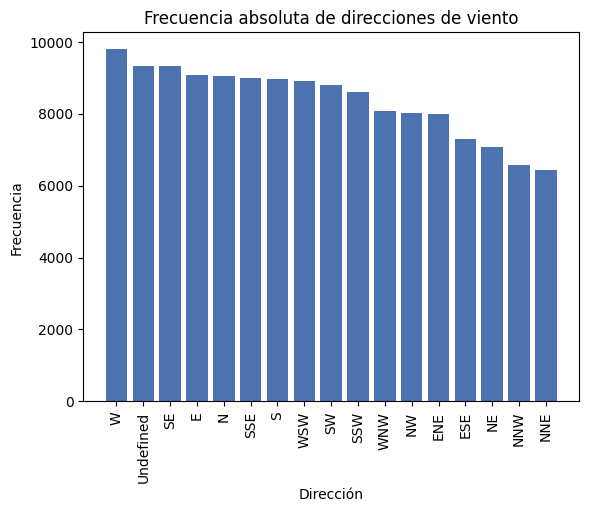

In [24]:
# Calcular la frecuencia absoluta de las direcciones de viento a las 9am
frecuencia_absoluta = data['WindGustDir'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencia_absoluta.index, frecuencia_absoluta.values, color='#4C72B0')

# Agregar etiquetas al gráfico
plt.title('Frecuencia absoluta de direcciones de viento')
plt.xlabel('Dirección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Basándonos en los datos que nos proporcionaste, la dirección predominante del viento en la localidad es Oeste (W), ya que es la dirección con mayor frecuencia absoluta y relativa

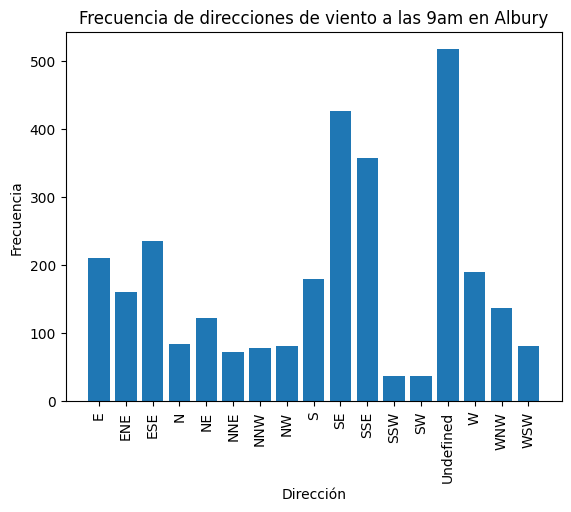

In [25]:
# Seleccionar los datos solo para la ciudad ingresada por el usuario
data_city = data[data['Location'] == city]

# Agrupar los datos por dirección de viento a las 9am y contar las frecuencias absolutas
grouped = data_city.groupby('WindDir9am').size().reset_index(name='counts')

# Crear un gráfico de barras
plt.bar(grouped['WindDir9am'], grouped['counts'])

# Agregar etiquetas al gráfico
plt.title(f'Frecuencia de direcciones de viento a las 9am en {city}')
plt.xlabel('Dirección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este caso decidimos ser un poco más específicos y no generalizar para todo el país, sino por localidad, ya que al ser un país con mucha variación geológica este tiende afectar de manera diferente en cada lugar.

In [26]:
#Frecuencia absoluta
frecuencia_absoluta = data['RainToday'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['RainToday'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data['RainToday'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que más se repite es/son:  ',moda2)

     Frecuencia absoluta  Frecuencia relativa
No                110738             0.778787
Yes                31455             0.221213
 
El valor que más se repite es/son:   ['No']


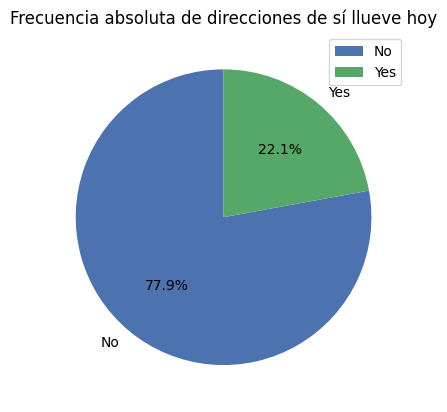

In [27]:
frecuencia_absoluta = data['RainToday'].value_counts()
frecuencia_relativa = data['RainToday'].value_counts(normalize=True)

# Crear un gráfico de torta
plt.pie(frecuencia_absoluta.values, labels=frecuencia_absoluta.index, autopct='%1.1f%%', startangle=90, colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4EACC5', '#B2D8E5'])

# Agregar etiquetas al gráfico
plt.title('Frecuencia absoluta de direcciones de sí llueve hoy')
plt.legend(frecuencia_absoluta.index, loc='upper right')

# Mostrar el gráfico
plt.show()

Los datos parecen indicar si lloverá o no en un día determinado, donde "No" indica que no lloverá y "Yes" indica que sí lloverá. En este caso, "No" tiene una frecuencia mucho más alta, lo que indica que es más probable que no llueva en un día determinado.

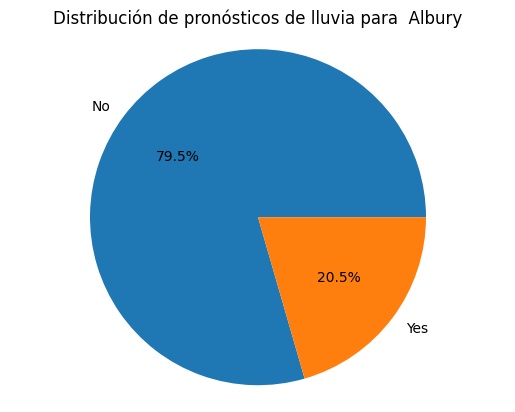

In [28]:
# Seleccionar los datos solo para la ciudad ingresada por el usuario
data_city = data[data['Location'] == city]

# Agrupar los datos por dirección de viento a las 9am y contar las frecuencias absolutas
grouped = data_city.groupby('RainTomorrow').size().reset_index(name='counts')

# Calcular los porcentajes de cada dirección de viento
grouped['percentage'] = grouped['counts'] / grouped['counts'].sum() * 100

# Crear un gráfico de torta
plt.pie(grouped['percentage'], labels=grouped['RainTomorrow'], autopct='%1.1f%%')

# Agregar etiquetas al gráfico
plt.title(f'Distribución de pronósticos de lluvia para  {city}')
plt.axis('equal')

# Mostrar el gráfico
plt.show()

En este caso decidimos ser un poco más específicos y no generalizar para todo el país, sino por localidad, ya que al ser un país con mucha variación geológica este tiende afectar de manera diferente en cada lugar.

In [29]:
#VARIABLE RainTomorrow

#Frecuencia absoluta
frecuencia_absoluta = data['RainTomorrow'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['RainTomorrow'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data['RainTomorrow'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que más se repite es/son: ',moda2)

     Frecuencia absoluta  Frecuencia relativa
No                110316             0.775819
Yes                31877             0.224181
 
El valor que más se repite es/son:  ['No']


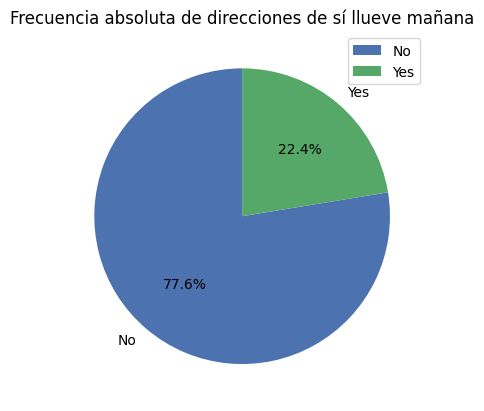

In [30]:
frecuencia_absoluta = data['RainTomorrow'].value_counts()
frecuencia_relativa = data['RainTomorrow'].value_counts(normalize=True)

# Crear un gráfico de torta
plt.pie(frecuencia_absoluta.values, labels=frecuencia_absoluta.index, autopct='%1.1f%%', startangle=90, colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4EACC5', '#B2D8E5'])

# Agregar etiquetas al gráfico
plt.title('Frecuencia absoluta de direcciones de sí llueve mañana')
plt.legend(frecuencia_absoluta.index, loc='upper right')

# Mostrar el gráfico
plt.show()

Los datos parecen indicar la frecuencia de días en los que llueve y en los que no llueve. La variable "No" representa la frecuencia absoluta de días en los que no llueve y tiene una frecuencia relativa del 77.5%, lo que sugiere que la mayoría de los días no llueve. La variable "Yes" representa la frecuencia absoluta de días en los que sí llueve y tiene una frecuencia relativa del 22.4%, lo que propone que en general hay menos días de lluvia en comparación con los días sin lluvia.

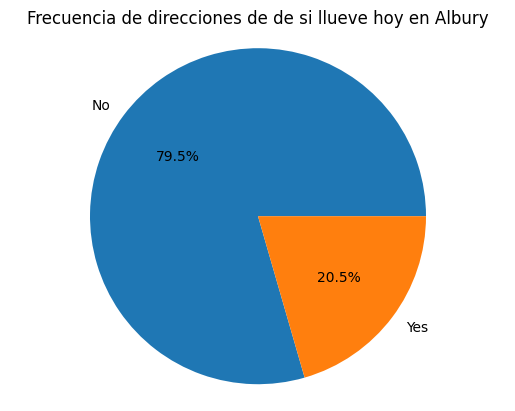

In [31]:
# Seleccionar los datos solo para la ciudad ingresada por el usuario
data_city = data[data['Location'] == city]

# Agrupar los datos por dirección de viento a las 9am y contar las frecuencias absolutas
grouped = data_city.groupby('RainTomorrow').size().reset_index(name='counts')

# Calcular los porcentajes de cada dirección de viento
grouped['percentage'] = grouped['counts'] / grouped['counts'].sum() * 100

# Crear un gráfico de torta
plt.pie(grouped['percentage'], labels=grouped['RainTomorrow'], autopct='%1.1f%%')

# Agregar etiquetas al gráfico
plt.title(f'Frecuencia de direcciones de de si llueve hoy en {city}')
plt.axis('equal')

# Mostrar el gráfico
plt.show()

En este caso decidimos ser un poco más específicos y no generalizar para todo el país, sino por localidad, ya que al ser un país con mucha variación geológica este tiende afectar de manera diferente en cada lugar.

In [32]:
min_temps = {}
max_temps = {}
for loc in data["Location"].unique():
    min_temp = data.loc[data["Location"] == loc, "MinTemp"].min()
    max_temp = data.loc[data["Location"] == loc, "MaxTemp"].max()
    min_temps[loc] = min_temp
    max_temps[loc] = max_temp

min_tempsmedia = {}
min_tempsmediana = {}
min_tempsmoda = {}
max_tempsmedia = {}
max_tempsmediana = {}
max_tempsmoda = {}

for loc in data["Location"].unique():

    min_temp_media = data.loc[data["Location"] == loc, "MinTemp"].mean()
    min_tempsmedia[loc] = round(min_temp_media, 2)
    min_temp_mediana = data.loc[data["Location"] == loc, "MinTemp"].median()
    min_tempsmediana[loc] = round(min_temp_mediana, 2)
    min_temp_moda = statistics.mode(data.loc[data["Location"] == loc, "MinTemp"])
    min_tempsmoda[loc] = min_temp_moda

    max_temp_media = data.loc[data["Location"] == loc, "MaxTemp"].mean()
    max_tempsmedia[loc] = round(max_temp_media, 2)
    max_temp_mediana = data.loc[data["Location"] == loc, "MaxTemp"].median()
    max_tempsmediana[loc] = round(max_temp_mediana, 2)
    max_temp_moda = statistics.mode(data.loc[data["Location"] == loc, "MaxTemp"])
    max_tempsmoda[loc] = max_temp_moda



dataprueba = pd.DataFrame(list(min_temps.items()), columns=["Location", "MinTemp"])
dataprueba["MinTempMedia"] = list(min_tempsmedia.values())
dataprueba["MinTempMediana"] = list(min_tempsmediana.values())
dataprueba["MinTempModa"] = list(min_tempsmoda.values())
dataprueba["MaxTemp"] = list(max_temps.values())
dataprueba["MaxTempMedia"] = list(max_tempsmedia.values())
dataprueba["MaxTempMediana"] = list(max_tempsmediana.values())
dataprueba["MaxTempModa"] = list(max_tempsmoda.values())




dataprueba.to_csv("temperaturas_min_max.csv", index=False)

print("El dataframe de prueba tiene {} filas y {} columnas".format(dataprueba.shape[0], dataprueba.shape[1]))


El dataframe de prueba tiene 49 filas y 9 columnas


Generamos una data de prueba para poder ver como se verían la media, mediana y moda, siendo estás más representativas, a diferencia si generalizamos todo y cambiamos nulos por datos generales

In [33]:
dataprueba.head(10)

,Location,MinTemp,MinTempMedia,MinTempMediana,MinTempModa,MaxTemp,MaxTempMedia,MaxTempMediana,MaxTempModa
0,Albury,-2.8,9.52,9.10,10.00000,44.8,22.63,21.90,14.900000
1,BadgerysCreek,-3.0,11.14,11.40,8.90000,46.4,24.02,23.25,19.000000
2,Cobar,-2.0,13.12,13.00,6.70000,46.6,25.83,25.80,17.000000
3,CoffsHarbour,0.6,14.37,15.00,18.00000,39.2,23.92,24.00,25.000000
4,Moree,-3.3,12.79,13.30,20.30000,47.3,26.89,27.10,33.700000
5,Newcastle,2.2,13.74,13.74,13.74024,44.1,24.10,24.00,24.098283
6,NorahHead,4.6,15.38,15.60,19.10000,44.0,22.61,22.60,19.400000
7,NorfolkIsland,9.4,16.84,16.70,16.10000,28.4,21.79,21.60,20.300000
8,Penrith,-1.1,12.53,12.80,17.20000,46.9,24.73,24.00,20.000000
9,Richmond,-4.8,11.35,11.70,15.60000,47.0,24.45,23.80,19.800000


En este caso mostramos estos datos, ya que nos dimos cuenta de que no se pueden comparar ciertas ciudades, por el hecho de que tienen muchas diferencias climáticas y se encuentran en distintos lados y no están en igualdad de condición. Un buen ejemplo sería tener 200 datos con 50 nulos de La antártica Chilena y 50 datos con 20 nulos de El desierto de Atacama, no podemos sobreponer los datos de Antártica a Atacama, ya que estas son muy diferentes entre sí. Para este análisis es importante conocer la Data y poder identificar los riesgos que supone hacer un remplazo de datos.

#Preguntas

### Pregunta 1: ¿Cuál es la relación entre la temperatura mínima y la probabilidad de lluvia para la locación en el dataset?


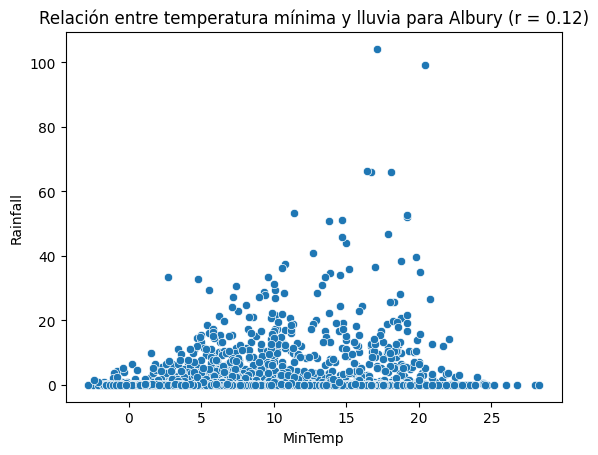

In [34]:
#El gráfico de dispersión muestra la relación entre la temperatura mínima
# y la lluvia para cada ubicación en el dataset. Cada punto en el gráfico
#representa una observación de temperatura mínima y lluvia para una ubicación determinada.

df_newcastle_temperatura = data.loc[data["Location"]==city , ["MinTemp", "Rainfall"]]

corr_val = df_newcastle_temperatura.corr().iloc[0,1]

sns.scatterplot(data=df_newcastle_temperatura, x="MinTemp", y="Rainfall")
plt.title(f"Relación entre temperatura mínima y lluvia para {city } (r = {corr_val:.2f})")
plt.show()


La pendiente y dirección de la nube de puntos indica el tipo de relación entre las dos variables. Si la nube de puntos muestra una tendencia ascendente de izquierda a derecha, esto indica una relación positiva entre las dos variables, lo que significa que a medida que la temperatura mínima aumenta, la lluvia también tiende a aumentar. Por otro lado, si la nube de puntos muestra una tendencia descendente de izquierda a derecha, esto indica una relación negativa, lo que significa que a medida que la temperatura mínima aumenta, la lluvia tiende a disminuir.

En cada gráfico, el título indica el nombre de la ubicación y el coeficiente de correlación entre la temperatura mínima y la lluvia para esa ubicación. El coeficiente de correlación es un número que varía entre -1 y 1, y que indica la fuerza y dirección de la relación entre las dos variables. Un valor de 1 indica una relación positiva perfecta, mientras que un valor de -1 indica una relación negativa perfecta. Un valor de 0 indica que no hay relación entre las dos variables. Un coeficiente de correlación cercano a 0 indica una relación débil, mientras que un coeficiente cercano a 1 o -1 indica una relación fuerte.

En resumen, el gráfico de dispersión y el coeficiente de correlación son herramientas útiles para visualizar y cuantificar la relación entre dos variables, en este caso, la temperatura mínima y la lluvia para cada ubicación en el dataset.

### Pregunta 2: ¿Cuál es la evaporación media en las diferentes locaciones durante los meses de verano?

In [35]:
df_filtrado = data[((data['Date'].dt.month >= 12) | (data['Date'].dt.month <= 3)) & (data['Location'] == city)]
evap_media_verano = df_filtrado['Evaporation'].mean()
display(HTML(f'<font color="white"><b><font size="4">La evaporación media en {city} durante los meses de verano es : <font color="red">{evap_media_verano:.2f}</font></b></font>'))


Para poder henerar esto, primero filtramos los meses de Verano, para esto hicimos una busqueda de cuales son los meses de Verano en Australia, En Australia, el verano va de diciembre a marzo, luego le dimos los parametros correspondientes, rescatamos la media de Evaporacion, con el filtro de la Locacion que queremos, para eso usamos un input en la cual uno puede ver la Evaporacion media de la Locacion que uno quiera.

### Pregunta 3: ¿Cuál es la locación con la temperatura media más alta durante el mes de septiembre en el dataset?(al ser un mes de cambio de estacion)

In [36]:
df_sep = data[data['Date'].dt.month == 9]
temperaturamedia = df_sep.groupby("Location")["MaxTemp"].mean()
lugarmascaluroso = temperaturamedia.sort_values(ascending=False).index[0]
display(HTML(f'<font color="white"><b><font size="4">La ubicación con la temperatura media más alta en septiembre es : <font color="red">{lugarmascaluroso}</font></b></font>'))

Para poder saber la temperatura media mas alta en septiembre, primero filtramos el mes de septiembre, que es el n 09, luego sacamos la media de la temperatura Maxima, ordenamos los datos de mayor a menor, en este caso el que tiene la media de Temperaturas mas altas es la locacion de Katherine

### Pregunta 4 :¿Cuál es la temperatura mínima más baja registrada en la locación especificada en el dataset?


In [37]:
#Locacion = input("Ingrese la ubicación para la cual desea conocer la temperatura mínima: ")
min_temps = {}
loc_min_temp = data.loc[data["Location"].str.contains(city), "MinTemp"].min()
min_temps[city] = loc_min_temp
display(HTML(f'<font color="white"><b><font size="4"> La temperatura mínima registrada en {city} es : <font color="red">{loc_min_temp}</font></b></font>'))

Para esto rescatamos la temperatura minima con el filtro de Locacion que usamos definiendo un input, luego imprimimos el resultado, cabe rescatar que se puede buscar la temperatura minima de la Locacion que uno quiera

# Mapa interactivo de temperaturas en Australia

In [38]:
min_temps = {}
max_temps = {}


for loc in data["Location"].unique():
    min_temp = data.loc[data["Location"] == loc, "MinTemp"].min()
    max_temp = data.loc[data["Location"] == loc, "MaxTemp"].max()
    min_temps[loc] = min_temp
    max_temps[loc] = max_temp

df = pd.DataFrame(list(min_temps.items()), columns=["Location", "MinTemp"])

df["MaxTemp"] = list(max_temps.values())



df.to_csv("temperaturas_minimas.csv", index=False)

print("El dataframe para generar el mapa tiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))
df.head(2)

El dataframe para generar el mapa tiene 49 filas y 3 columnas


,Location,MinTemp,MaxTemp
0,Albury,-2.8,44.8
1,BadgerysCreek,-3.0,46.4


Esto nos genera una data nueva con los datos de nuestro dataset original, el cual rescata solamente las Locaciones y la Temperatura Mínima para cada Locación

In [39]:
df['Coords'] = [
    (-36.080477, 146.9162803), (-33.87761, 150.87845), (-31.49833, 145.83444), (-30.29626, 153.11309), (-29.47141, 149.84149), (-32.92715, 151.78107), (-33.28333, 151.56792), (-29.04083, 167.93841), (-33.75806, 150.7056), (-37.8182717, 145.0013618), (-33.86514, 151.2099), (-33.94611, 151.1772), (-35.15803, 147.45751), (-32.815, 151.8428), (-34.42444, 150.893), (-35.3075, 149.1244), (-35.41667, 149.10000), (-35.52944, 148.772), (-37.55, 143.85), (-36.75, 144.3), (-38.109, 146.93),
    (-37.67, 144.83), (-37.81, 144.96), (-34.18, 142.16), (-35.43, 141.53), (-38.35, 141.61), (-37.71, 145.08), (-37.93, 141.28), (-27.47, 153.03), (-16.87, 145.75),
    (-28.17, 153.5), (-19.25, 146.8), (-34.93, 138.62), (-37.82, 140.78), (-34.47, 138.99), (-31.15, 136.81), (-34.94, 117.8), (-34.02, 115.4), (-31.93, 116.03), (-31.94, 115.97), (-31.95, 115.86), (-32.97944, 121.64889), (-34.97722, 116.73194), (-42.88056, 147.32472), (-41.43861, 147.13417), (-23.795, 133.8875), (-12.4634, 130.8456), (-14.47361, 132.2625), (-25.34444, 131.03694)]


df.to_csv('temperaturas_minimas.csv', index=False)
df.head(2)

,Location,MinTemp,MaxTemp,Coords
0,Albury,-2.8,44.8,"(-36.080477, 146.9162803)"
1,BadgerysCreek,-3.0,46.4,"(-33.87761, 150.87845)"


Este código nos permite crear una columna nueva que guarde las coordenadas que el género según su nombre, para esto el nombre debe ser bien especifico para que no se confunda con otras Locaciones en diferentes lugares del mundo con el mismo nombre

In [40]:
import pandas as pd
import folium

df = pd.read_csv("temperaturas_minimas.csv")
m = folium.Map(location=[-25, 135], zoom_start=3.5)

for index, row in df.iterrows():
    if row["Coords"]:
        coords = eval(row["Coords"])
        popup_text = f"{row['Location']}: MaxTemp  {row['MaxTemp']} MinTemp  {row['MinTemp']}"
        folium.Marker(location=coords, popup=popup_text, max_width=300, min_height=150).add_to(m)

m.save("mapa.html")
m

Este Mapa nos permite identificar el lugar exacto de cada Locación y su temperatura mínima

Se puede concluir con esto, que hasta el momento no necesariamente estas puedan tener datos similares, no por estar una al lado de otra, esto puede ser por diferentes motivos como, falto data, la altitud, que tan cerca del mar esta, y la más importante...  La fecha en cuál esta se registró, etc.

---------------------------------------------------------------------------------

--------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Importaciones necesarias para nuestra predicción

In [41]:
# Cargar librerias
import numpy as np
import math as mt
import pandas as pd

#import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

#from geopandas.tools import geocode
from IPython.display import clear_output
from IPython.display import display, HTML
from statistics import mode, multimode
import statistics

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix,precision_score,f1_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from collections import Counter

clear_output()

# Preparación de datos para las predicciones

In [42]:
valores_unicos = data["Location"].unique()
ubicaciones_numeros = {ubicacion: num+1 for num, ubicacion in enumerate(valores_unicos)}

# Reemplazar los valores en la columna "Location"
data["Location"].replace(ubicaciones_numeros, inplace=True)

#guardamos la descripcion de RainTomorrow
valores_unicos_RainTomorrow = data["RainTomorrow"].unique()

In [43]:
wind_gust_dir_vals = data["WindGustDir"].unique()
wind_dir_9am_vals = data["WindDir9am"].unique()
wind_dir_3pm_vals = data["WindDir3pm"].unique()

# Crear diccionario de mapeo para cada columna
wind_gust_dir_map = {val: i+1 for i, val in enumerate(wind_gust_dir_vals)}
wind_dir_9am_map = {val: i+1+len(wind_gust_dir_vals) for i, val in enumerate(wind_dir_9am_vals)}
wind_dir_3pm_map = {val: i+1+len(wind_gust_dir_vals)+len(wind_dir_9am_vals) for i, val in enumerate(wind_dir_3pm_vals)}

# Reemplazar los valores en cada columna
data["WindGustDir"] = data["WindGustDir"].map(wind_gust_dir_map)
data["WindDir9am"] = data["WindDir9am"].map(wind_dir_9am_map)
data["WindDir3pm"] = data["WindDir3pm"].map(wind_dir_3pm_map)

En este caso vamos a analizar una transformación a los datos, ya que al ser valores con caracteres al colocarlo en cualquier modelo este tendría problemas a la hora de predecir, por lo tanto, lo que realizamos fue la transformación de los siguientes valores, WindGustDir que indica la dirección del viento, WindDir9am que indica la dirección del viento a las 9 de la mañana y WindDir3pm que indica la dirección del viento a las 3 de la tarde. También realizamos la transformación de la variable Location la cual indica el lugar de donde se registraron ciertas características y lo transformamos a valor numérico.

In [44]:
data["RainTomorrow"] = data["RainTomorrow"].replace({"Yes": 1, "No": 0})
# cambiar el tipo de dato de la columna "RainTomorrow" a int
data["RainTomorrow"] = data["RainTomorrow"].astype(int)
data["RainToday"] = data["RainToday"].replace({"Yes": 1, "No": 0})
# cambiar el tipo de dato de la columna "RainToday" a int
data["RainToday"] = data["RainToday"].astype(int)

print(data["RainTomorrow"].unique())
print(data["RainTomorrow"].dtype)
print(data["RainToday"].unique())
print(data["RainToday"].dtype)

[0 1]
int64
[0 1]
int64


### Elección de variables

Para este caso vamos a utilizar un mapa de calor, el cual es una herramienta visual que te ayuda a identificar las variables más relevantes para predecir una variable específica al mostrar la correlación entre las variables de entrada y la variable de salida que es RainTomorrow el cual indica si es que mañana llueve en cierta localidad, en este caso lo vamos a hacer de manera más generaliza.


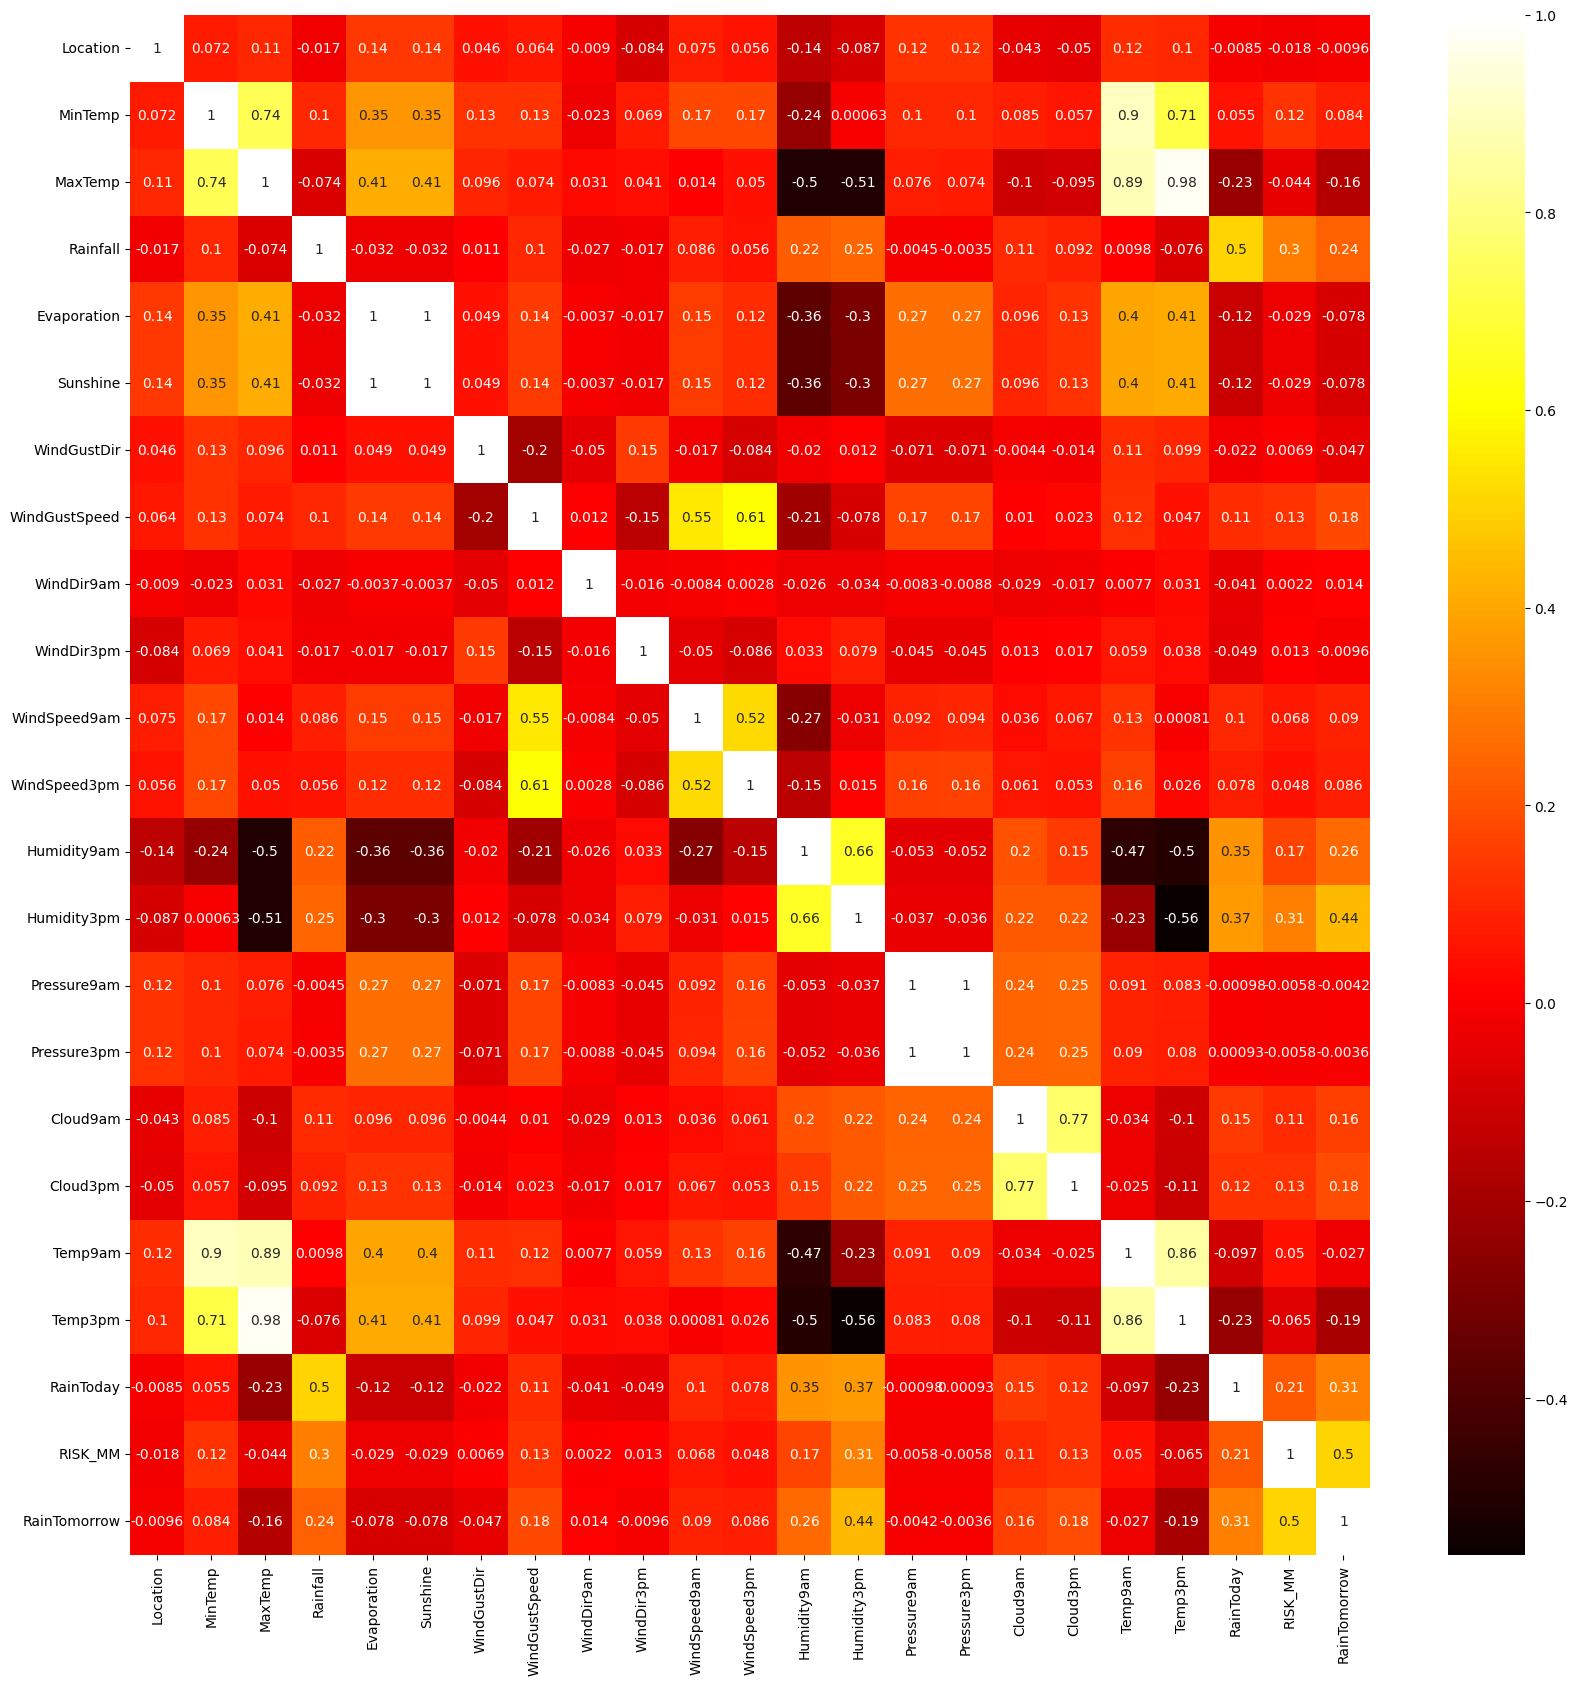

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='hot')
plt.show()

### Justificación elección de variables

* Durante este proceso realizaremos la elección de nuestras variables predictoras para aplicarlos a nuestros modelos de producción supervisado en este caso nos basaremos en un mapa de calor para su elección en este caso nuestra variable predictora va aser RainTomorrow la cual indica si es que va a llover mañana unas de las primeras variables que vamos a utilizar RainToday la cual tiene una correlación de un 31% la cual no es mucha pero es más comparado a las otras variables, otra de las variables que consideramos para las predicciones fue RainFall 24% de correlación con la variable objetivo, también realizamos la elección de la variable Humidity3pm la cual indica la humedad presente a las 3 pm con una correlación de un 44% con la variable target y por último elegimos la variable Humidity9am que indica la humedad presente a las 9 am con un porcentaje de correlación de un 26% con la variable target.

# Generación modelos predictivos

### Objetivo de modelo predictivo Regresión logística



Durante la aplicación del primer modelo predictivo que es regresión logística en el cual como equipo registramos la evolución de este mismo

**Resultados esperados**
Como equipo esperamos que el modelo no alcance un porcentaje de precisión alta más que nada por la falta de variables independientes que alimente al modelo para predecir de mejor manera.


## Aplicación Modelo 1 **Regresión logística**

### Modelos previos antes de llegar al rendimiento esperado (al menos 1)

En el primer intento de la aplicación utilizamos como variables independientes “RainToday” y “RainFall”. Y como variable dependiente empleamos “RainTomorrow” el cual nos indica si es que mañana va a llover. En este caso para evaluar este modelo empleamos 3 métricas las cuales nos indican cuán efectivo es nuestro modelo, en este caso usamos el Accuracy es una medida de qué tan bien el modelo puede predecir correctamente el target, el recall, o tasa de verdaderos positivos, es una medida de qué tan bien el modelo puede encontrar todas las instancias de una clase determinada y el F1 score es una medida que combina la precisión y el recall del modelo. Es particularmente útil cuando las clases están desequilibradas en los datos de entrenamiento.

In [46]:
# Se separan las variables predictoras y la predecida
X = data[['RainToday','Rainfall']] # Variables independientes
y = data['RainTomorrow'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=29)
# Creación de modelo
modelo = LogisticRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)

history_Accuracy = []

# Evaluación del modelo
print("{0:<20} : {1}".format('Accurancy del modelo', accuracy_score(y_test, y_pred)))
print("{0:<20} : {1}".format('F1 score del modelo', f1_score(y_test, y_pred)))
print("{0:<20} : {1}".format('Recall del modelo', recall_score(y_test, y_pred)))

# Guarda el resultado para comparar
history_Accuracy.append(accuracy_score(y_test, y_pred))

Accurancy del modelo : 0.7874046204156264
F1 score del modelo  : 0.20153195985208663
Recall del modelo    : 0.11991199119911991


Aunque el modelo presenta una precisión razonablemente alta (78.74%) al clasificar las muestras en general, los valores del F1 score y del recall son notablemente bajos (0.201 y 0.1199 respectivamente). Estos resultados sugieren que el modelo enfrenta dificultades al identificar y recuperar correctamente las instancias de una clase específica.

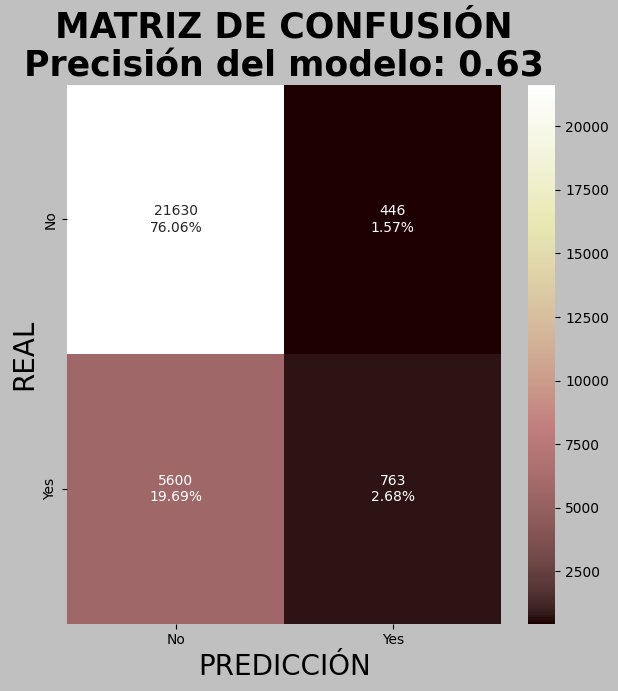

In [47]:
# Evaluación del modelo
matriz_modelo1 = confusion_matrix(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_RainTomorrow
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo1.flatten() / matriz_modelo1.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo1, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_1:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

En este caso quisimos mostrar la matriz de confusión la cual es una herramienta que nos ayuda a evaluar y comprender el rendimiento del modelo, proporcionando información sobre los aciertos y errores de la clasificación realizada por el modelo. En este caso nos indica los siguientes valores.

* Verdaderos positivos (VP): 763
* Verdaderos negativos (VN): 21630
* Falsos positivos (FP): 446
* Falsos negativos (FN): 5600

### *¿Qué podemos inferir de esto?*

* La precisión de la matriz es de 0.631, lo que indica que aproximadamente el 63.1% de las predicciones positivas realizadas por el modelo fueron correctas.
* El accuracy es de 0.787, lo que significa que aproximadamente el 78.7% de las predicciones totales realizadas por el modelo fueron correctas.
* El recall es de 0.120, lo que significa que aproximadamente el 12% de los casos positivos fueron identificados correctamente por el modelo.
* El F1-score es de 0.202, lo que indica un rendimiento relativamente bajo. Esto puede ser consecuencia de una baja precisión y/o recall.

En resumen, los resultados de las métricas indican que el modelo tiene una precisión y exactitud razonables, pero un rendimiento bajo en términos de recall y F1-score. Esto sugiere que el modelo puede estar teniendo dificultades para identificar correctamente los casos positivos, lo que resulta en un bajo recall y un bajo F1-score.



### Modelo final - con un rendimiento superior al 80%

En este segundo intento vamos a ver la evolución del modelo anterior, ya que al tener un bajo porcentaje de precisión intentamos incrementarlo agregando más variables para ver si así mejora nuestro rendimiento, en este caso vamos a agregar las siguientes variables "Humidity3pm" y "Humidity9am".

In [48]:
# Se separan las variables predictoras y la predecida
X = data[['RainToday','Rainfall','Humidity3pm','Humidity9am']] # Variables independientes
y = data['RainTomorrow'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=29)
# Creación de modelo
logistic_regression_model = LogisticRegression()
# Entrenamiento del modelo
logistic_regression_model.fit(X_train, y_train)
# Validación del modelo
y_pred = logistic_regression_model.predict(X_test)

# Evaluación del modelo
print("{0:<20} : {1}".format('Accurancy del modelo', accuracy_score(y_test, y_pred)))
print("{0:<20} : {1}".format('F1 score del modelo', f1_score(y_test, y_pred)))
print("{0:<20} : {1}".format('Recall del modelo', recall_score(y_test, y_pred)))

# Guarda el resultado para comparar
history_Accuracy.append(accuracy_score(y_test, y_pred))

Accurancy del modelo : 0.8293540560497907
F1 score del modelo  : 0.5059554107706403
Recall del modelo    : 0.39053905390539057


Guardamos nuestro modelo para posteriormente aplicar un despliegue pero con diferentes datos.

In [49]:
import pickle
# Guardar el modelo entrenado en un archivo
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model, file)


* El accuracy es de 0.829, lo que indica que aproximadamente el 82.9% de las predicciones realizadas por el modelo fueron correctas.
* El recall es de 0.391, lo que indica que aproximadamente el 39.1% de los casos positivos fueron identificados correctamente por el modelo.
* El F1-score es de 0.506, lo que indica un rendimiento relativamente bueno.

En resumen, el modelo tiene un buen accuracy, lo que indica que la mayoría de las predicciones son correctas en general. Sin embargo, el recall es relativamente bajo, lo que sugiere que el modelo puede tener dificultades para identificar correctamente los casos positivos. El F1-score tiene un valor medio, lo que implica un equilibrio entre la precisión y el recall del modelo.

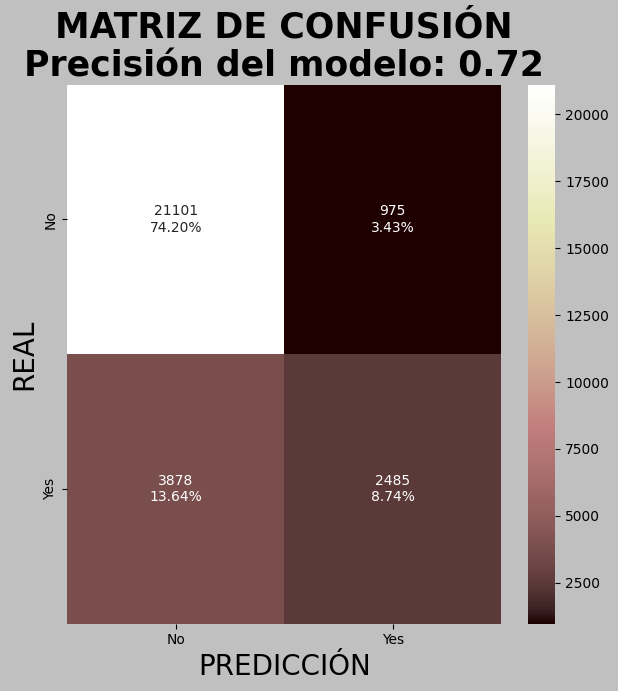

In [50]:
# Evaluación del modelo
matriz_modelo2 = confusion_matrix(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_RainTomorrow
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo2.flatten() / matriz_modelo2.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo2, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_2:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

En este caso quisimos mostrar la matriz de confusión la cual nos ayuda a evaluar y comprender el rendimiento del modelo, proporcionando información sobre los aciertos y errores de la clasificación realizada por el modelo. En este caso nos indica los siguientes valores.

* Verdaderos positivos (VP): 2485
* Verdaderos negativos (VN): 21101
* Falsos positivos (FP): 975
* Falsos negativos (FN): 3878

### *¿Qué podemos inferir de la evolución del modelo?*

* La precisión de la matriz es de 0.718, lo que indica que aproximadamente el 71.8% de las predicciones positivas realizadas por el modelo fueron correctas.
* El accuracy es de 0.829, lo que significa que aproximadamente el 82.9% de las predicciones totales realizadas por el modelo fueron correctas.
* El recall es de 0.391, lo que significa que aproximadamente el 39.1% de los casos positivos fueron identificados correctamente por el modelo.
* El F1-score es de 0.506, lo que indica un rendimiento moderado en términos de equilibrio entre la precisión y el recall del modelo.

En resumen, el modelo tiene una precisión y un accuracy razonables, lo que indica que las predicciones positivas y totales son en su mayoría correctas. Sin embargo, el recall es relativamente bajo, lo que sugiere que el modelo puede tener dificultades para identificar correctamente los casos positivos. El F1-score tiene un valor medio, lo que implica un equilibrio entre la precisión y el recall del modelo. Esto puede indicar que el modelo puede beneficiarse de mejoras en la detección de casos positivos


### Resultados y conclusiones de la experimentación - Modelo 1

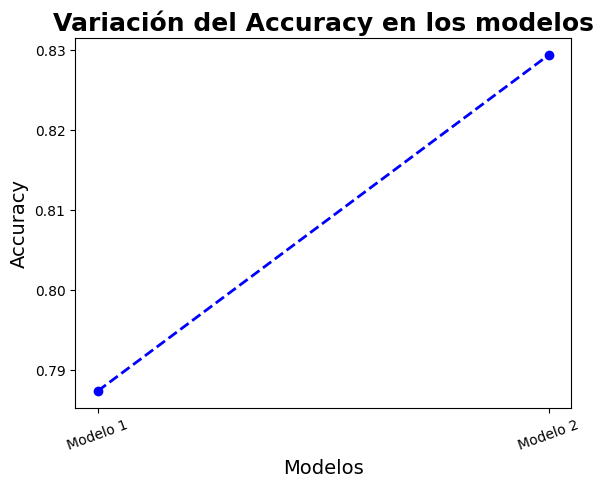

In [51]:
plt.title("Variación del Accuracy en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("Accuracy", fontsize=14)
plt.xticks([0, 1], ['Modelo 1', 'Modelo 2'], rotation=20)
plt.plot(history_Accuracy, 'bo--', linewidth=2, markersize=6);

Comparando los resultados entre el Modelo 1 y el Modelo 2, podemos concluir que el rendimiento del Modelo 2 ha mejorado en varios aspectos clave, como precisión, accuracy, recall y F1-score. Esto indica una mejora general en la capacidad del Modelo 2 para realizar predicciones más precisas y acertadas en comparación con el Modelo 1.

Sin embargo, para que el Modelo 2 sea considerado confiable y pueda aplicarse de manera efectiva, aún existen áreas en las que podría mejorar:

* Recall: Aunque el Modelo 2 ha mejorado en términos de recall en comparación con el Modelo 1, todavía tiene margen de mejora. El recall representa la capacidad del modelo para identificar correctamente los casos positivos. Por lo tanto, es importante que el Modelo 2 pueda capturar un mayor porcentaje de casos positivos para mejorar su confiabilidad.

* Falsos positivos y falsos negativos: El Modelo 2 todavía tiene una cantidad considerable de falsos positivos (975) y falsos negativos (3878). Reducir tanto los falsos positivos como los falsos negativos es esencial para mejorar la confiabilidad del modelo. Una disminución en los falsos positivos ayudaría a evitar la clasificación incorrecta de casos negativos como positivos, mientras que una reducción en los falsos negativos permitiría identificar correctamente más casos positivos.

* Mejorar el F1-score: Aunque el Modelo 2 ha mostrado una mejora en el F1-score en comparación con el Modelo 1, aún hay espacio para mejorar. El F1-score es una medida del equilibrio entre la precisión y el recall, por lo que un mayor F1-score indica una mejor combinación de ambas métricas. Mejorar el F1-score implicaría trabajar en conjunto para aumentar tanto la precisión como el recall del modelo.

En resumen, aunque el Modelo 2 ha mostrado mejoras en varios aspectos en comparación con el Modelo 1, aún hay margen de mejora para que el modelo sea más confiable y efectivo en su aplicación. Es fundamental enfocarse en mejorar el recall, reducir los falsos positivos y falsos negativos, y buscar un equilibrio óptimo entre la precisión y el recall mediante la optimización del F1-score. Estos aspectos ayudarán a fortalecer la confiabilidad y utilidad del modelo en situaciones prácticas.


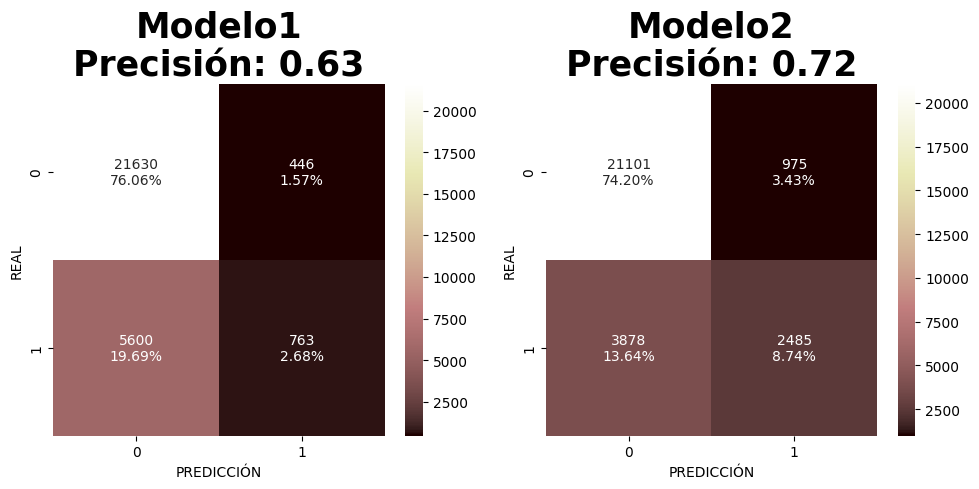

In [52]:
# Crear una lista con las matrices de confusión
matrices = [matriz_modelo1, matriz_modelo2]
precisiones = [precision_1, precision_2]

# Configurar los valores únicos para el eje x e y
valores_unicos = np.unique(np.concatenate((y_test, y_pred, y_pred)))

# Crear la figura y los subplots
fig, axs = plt.subplots(1, len(matrices), figsize=(10, 5))

# Iterar sobre las matrices y generar los gráficos
for i, matriz in enumerate(matrices):
    ax = axs[i]
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten() / matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(valores_unicos), len(valores_unicos))

    sns.heatmap(matriz, annot=labels, fmt='', cmap='pink', xticklabels=valores_unicos, yticklabels=valores_unicos, ax=ax)

    ax.set_title(f"Modelo{i+1}\nPrecisión: {precisiones[i]:.2f}", fontsize=25, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN")
    ax.set_ylabel("REAL")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### **Comparación de matrices de confusión:**

Verdaderos positivos (VP):

* Primer modelo: 763
* Segundo modelo: 2485
* El segundo modelo logra identificar un mayor número de verdaderos positivos en comparación con el primer modelo, lo cual es una mejora significativa.

Verdaderos negativos (VN):

* Primer modelo: 21630
* Segundo modelo: 21101
* Ambos modelos tienen valores similares de verdaderos negativos, no hay una diferencia significativa en este aspecto.
Falsos positivos (FP):

* Primer modelo: 446
* Segundo modelo: 975
* El primer modelo tiene menos falsos positivos en comparación con el segundo modelo, lo cual indica que el primer modelo clasifica correctamente más casos negativos.

Falsos negativos (FN):

* Primer modelo: 5600
* Segundo modelo: 3878
* El segundo modelo muestra una mejora en la identificación de falsos negativos en comparación con el primer modelo, lo cual es positivo.


En general, el segundo modelo muestra mejoras en la identificación de verdaderos positivos y falsos negativos en comparación con el primer modelo. Sin embargo, el primer modelo tiene menos falsos positivos. Por lo tanto, el segundo modelo parece tener un mejor rendimiento en términos de identificar casos positivos correctamente, pero aún puede mejorar en la identificación de casos negativos.


## Aplicación Modelo 2 **NaiveBayes**


### Objetivo de modelo predictivo NaiveBayes


Durante esta etapa aplicaremos otro modelo predictivo, el cual es Naive Bayes es un algoritmo de clasificación que se basa en el teorema de bayes y asume independencia entre las características. En otras palabras, el algoritmo Naive Bayes considera que todas las características son relevantes de manera independiente para la clasificación, sin considerar las posibles interacciones o dependencias entre ellas. Aunque este supuesto rara vez se cumple en la práctica, Naive Bayes sigue siendo efectivo en muchos casos y puede proporcionar resultados satisfactorios incluso cuando la independencia condicional no es estrictamente válida.

**Resultados esperados** Como equipo esperamos un mejor desempeño del modelo en comparación al anterior modelo, ya que vamos más variables independientes desde el principio para así tener una mejora más considerable a futuro del modelo y esperamos que el accuracy en esta ocasión va a ser un poco mayor al anterior.

### Modelos previos antes de llegar al rendimiento esperado (al menos 1)

In [53]:
test=data.drop(["Date","RainTomorrow","RISK_MM"],axis=1)

# Selecciona las variables
X = test
# Rescata la etiqueta
y = data.RainTomorrow
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

# Define el algoritmo a utilizar Naive Bayes
modelo = GaussianNB()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)

history_Accuracy = []


# Evaluación del modelo
print("{0:<20} : {1}".format('Accurancy del modelo', accuracy_score(y_test, y_pred)))
print("{0:<20} : {1}".format('F1 score del modelo', f1_score(y_test, y_pred)))
print("{0:<20} : {1}".format('Recall del modelo', recall_score(y_test, y_pred)))

# Guarda el resultado para comparar
history_Accuracy.append(accuracy_score(y_test, y_pred))

Accurancy del modelo : 0.795808572734625
F1 score del modelo  : 0.5446561593350584
Recall del modelo    : 0.5458117240295458


El modelo tiene una exactitud razonablemente alta (79.58%), lo que significa que acierta en la clasificación de las muestras en general. El F1 score también es relativamente bueno (0.544), lo que indica un equilibrio entre la precisión y el recall del modelo. El recall también es relativamente alto (54.57%), lo que sugiere que el modelo puede encontrar correctamente más de la mitad de las instancias positivas de la clase en cuestión.

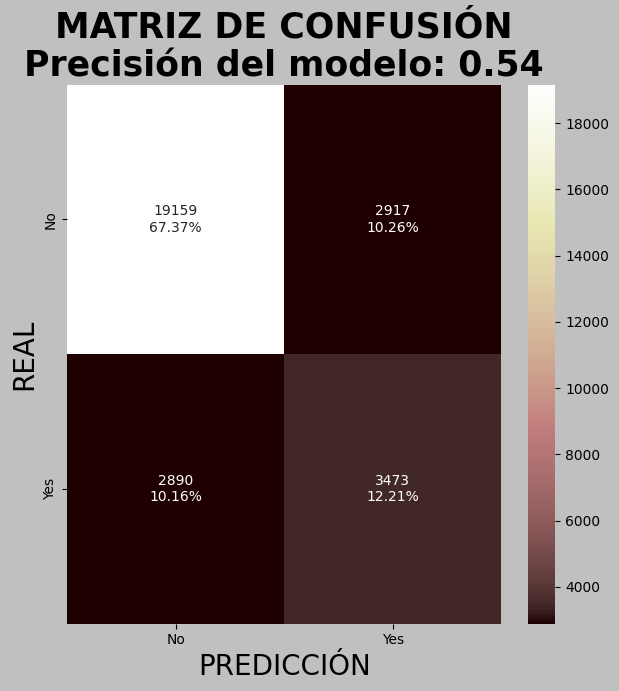

In [54]:
# Evaluación del modelo
matriz_modelo1 = confusion_matrix(y_test, y_pred)
precision_modelo1 = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_RainTomorrow
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo1.flatten() / matriz_modelo1.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo1, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_modelo1:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

En la matriz de confusión, tenemos cuatro valores clave:

* Verdaderos positivos (VP): 3473
* Verdaderos negativos (VN): 19159
* Falsos positivos (FP): 2917
* Falsos negativos (FN): 2890

*¿Qué podemos inferir de la evolución del modelo?*

En este caso, el modelo tiene una precisión del 54%, lo que significa que aproximadamente el 54% de las predicciones positivas realizadas por el modelo fueron correctas.

* El modelo tiene un accuracy del 79.6%, lo que indica que aproximadamente el 79.6% de todas las predicciones realizadas por el modelo fueron correctas.

* El F1-score es de aproximadamente 0.545, lo que indica un rendimiento moderado en términos de equilibrio entre la precisión y el recall.

* El modelo tiene un recall del 54.6%, lo que significa que aproximadamente el 54.6% de los casos positivos fueron identificados correctamente por el modelo.

En resumen, basado en los resultados proporcionados, el modelo tiene una precisión y recall similares, pero con un F1-score moderado. El accuracy del modelo indica un rendimiento generalmente bueno, pero sería recomendable evaluar otros aspectos del modelo, como el desequilibrio de clases o la distribución de errores (FP y FN) para obtener una imagen más completa de su desempeño.

### Modelo final - con un rendimiento superior al 80%

In [55]:
test=data.drop(["Date","RainTomorrow"],axis=1)

# Selecciona las variables
X = test
# Rescata la etiqueta
y = data.RainTomorrow
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

# Define el algoritmo a utilizar Naive Bayes
naive_bayes_model = GaussianNB()
# Entrenamiento del modelo
naive_bayes_model.fit(X_train, y_train)
# Validación del modelo
y_pred = naive_bayes_model.predict(X_test)



# Evaluación del modelo
print("{0:<20} : {1}".format('Accurancy del modelo', accuracy_score(y_test, y_pred)))
print("{0:<20} : {1}".format('F1 score del modelo', f1_score(y_test, y_pred)))
print("{0:<20} : {1}".format('Recall del modelo', recall_score(y_test, y_pred)))

# Guarda el resultado para comparar
history_Accuracy.append(accuracy_score(y_test, y_pred))

Accurancy del modelo : 0.9586483350328774
F1 score del modelo  : 0.9153591478335972
Recall del modelo    : 0.9993713657079993


Guardamos nuestro modelo para posteriormente aplicar un despliegue pero con diferentes datos.

In [56]:
import pickle
# Guardar el modelo entrenado en un archivo
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

El modelo tiene una exactitud muy alta (95.86%), lo que significa que acierta en la clasificación de las muestras en general. El F1 score también es alto (0.915), lo que indica un buen equilibrio entre la precisión y el recall del modelo. El recall es casi perfecto (99.94%), lo que sugiere que el modelo puede encontrar correctamente la gran mayoría de las instancias positivas de la clase en cuestión.

Estos resultados indican un rendimiento excelente del modelo, con una alta capacidad para clasificar correctamente las muestras y un buen equilibrio entre la precisión y el recall.

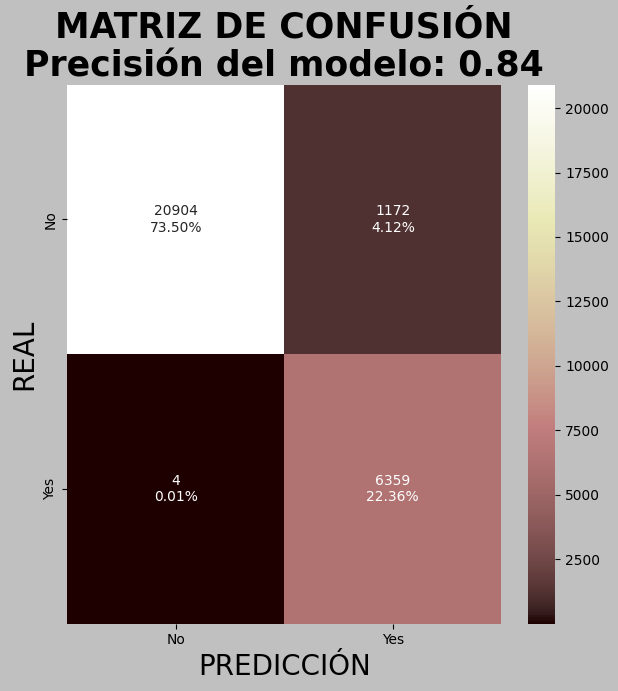

In [57]:
# Evaluación del modelo
matriz_modelo2 = confusion_matrix(y_test, y_pred)
precision_modelo2 = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_RainTomorrow
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo2.flatten() / matriz_modelo2.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo2, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_modelo2:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

En este caso, tenemos:

* Verdaderos positivos (VP): 20904
* Verdaderos negativos (VN): 6359
* Falsos positivos (FP): 1172
* Falsos negativos (FN): 4

*¿Qué podemos inferir de esto?*

En este caso, la precisión del mdoelo es de 0.84, lo que indica que aproximadamente el 84% de las predicciones positivas realizadas por el modelo fueron correctas.
* El accuracy es de 0.9586483350328774, lo que significa que aproximadamente el 95.86% de todas las predicciones realizadas por el modelo fueron correctas.
* El F1-score es de 0.9153591478335972, lo que indica un rendimiento muy bueno del modelo.
* El recall es de 0.9993713657079993, lo que significa que aproximadamente el 99.94% de los casos positivos fueron identificados correctamente por el modelo.

En resumen, el modelo tiene una alta precisión, lo que indica que la mayoría de las predicciones positivas son correctas. El accuracy y el recall también son altos, lo que indica que el modelo tiene un buen rendimiento en términos de clasificación global y la capacidad de identificar correctamente los casos positivos. El F1-score también es alto, lo que muestra un equilibrio entre la precisión y el recall del modelo.

### Resultados y conclusiones de la experimentación - Modelo 2

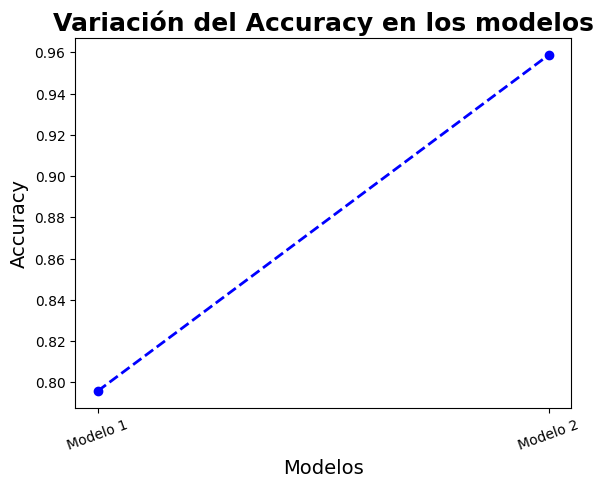

In [58]:
plt.title("Variación del Accuracy en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("Accuracy", fontsize=14)
plt.xticks([0, 1], ['Modelo 1', 'Modelo 2'], rotation=20)
plt.plot(history_Accuracy, 'bo--', linewidth=2, markersize=6);

Modelo 1 (Sin las tres variables: RISK_MM, Date, RainTomorrow):

* Accuracy del modelo: 0.795808572734625
* F1-score del modelo: 0.544584738451886
* Recall del modelo: 0.5456545654565457

Modelo 2 (Sin las dos variables: Date, RainTomorrow):

* Accuracy del modelo: 0.9586483350328774
* F1-score del modelo: 0.9153591478335972
* Recall del modelo: 0.9993713657079993

**Al comparar los resultados, podemos observar lo siguiente:**

Accuracy:

* El Modelo 2 tiene un accuracy significativamente mayor (0.9586) en comparación con el Modelo 1 (0.7958). Esto indica que el Modelo 2 tiene una mayor proporción de predicciones correctas en general.

F1-score:

* El Modelo 2 tiene un F1-score más alto (0.9154) en comparación con el Modelo 1 (0.5446). El F1-score combina la precisión y el recall en una sola métrica, y un valor más alto indica un mejor equilibrio entre ambas medidas. Por lo tanto, el Modelo 2 muestra un mejor rendimiento en términos de precisión y recall combinados.

Recall:

* El Modelo 2 tiene un recall mucho más alto (0.9994) en comparación con el Modelo 1 (0.5457). El recall mide la capacidad del modelo para identificar correctamente los casos positivos. Un valor más alto indica que el Modelo 2 es más efectivo en detectar los casos positivos.


En resumen, el Modelo 2, que excluye las variables "Date" y "RainTomorrow", muestra un rendimiento significativamente mejor en comparación con el Modelo 1, que también excluye la variable "RISK_MM". El Modelo 2 tiene una mayor precisión global (accuracy), un mejor equilibrio entre precisión y recall (F1-score) y una mayor capacidad para identificar casos positivos (recall).

Basándonos en estos resultados, podemos concluir que el Modelo 2 es más confiable y efectivo para realizar predicciones utilizando el algoritmo Naive Bayes en este escenario particular.

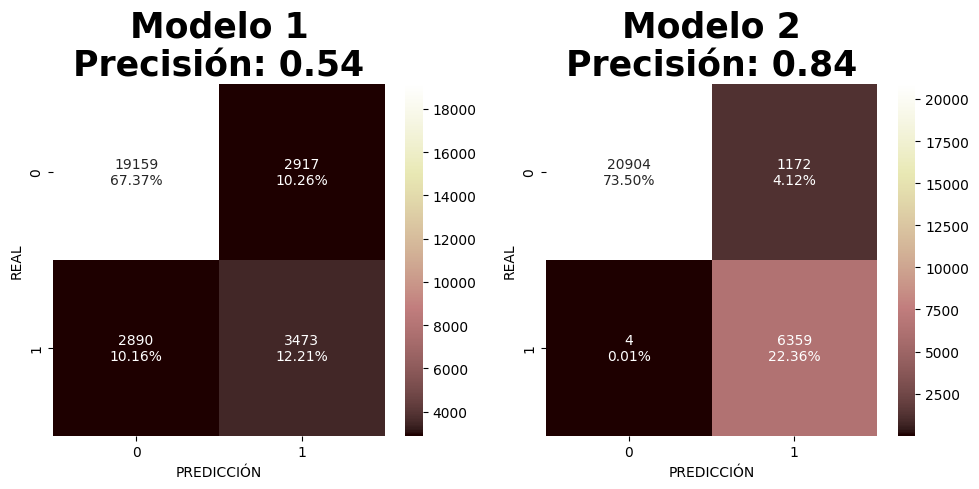

In [59]:
# Crear una lista con las matrices de confusión
matrices = [matriz_modelo1, matriz_modelo2]
precisiones = [precision_modelo1, precision_modelo2]

# Configurar los valores únicos para el eje x e y
valores_unicos = np.unique(np.concatenate((y_test, y_pred, y_pred)))

# Crear la figura y los subplots
fig, axs = plt.subplots(1, len(matrices), figsize=(10, 5))

# Iterar sobre las matrices y generar los gráficos
for i, matriz in enumerate(matrices):
    ax = axs[i]
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten() / matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(valores_unicos), len(valores_unicos))

    sns.heatmap(matriz, annot=labels, fmt='', cmap='pink', xticklabels=valores_unicos, yticklabels=valores_unicos, ax=ax)

    ax.set_title(f"Modelo {i+1}\nPrecisión: {precisiones[i]:.2f}", fontsize=25, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN")
    ax.set_ylabel("REAL")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Vamos a comparar las matrices de confusión de los dos modelos:

Modelo 1:

* Verdaderos positivos (VP): 3473
* Verdaderos negativos (VN): 19159
* Falsos positivos (FP): 2917
* Falsos negativos (FN): 2890
* Precisión de la matriz: 0.54

Modelo 2:

* Verdaderos positivos (VP): 20904
* Verdaderos negativos (VN): 6359
* Falsos positivos (FP): 1172
* Falsos negativos (FN): 4
* Precisión de la matriz: 0.84


Al comparar las matrices de confusión, podemos observar lo siguiente:

Verdaderos positivos (VP):

* El Modelo 2 tiene un mayor número de verdaderos positivos (VP: 20904) en comparación con el Modelo 1 (VP: 3472). Esto indica que el Modelo 2 es más efectivo para identificar correctamente los casos positivos.

Verdaderos negativos (VN):

* El Modelo 1 tiene un mayor número de verdaderos negativos (VN: 19160) en comparación con el Modelo 2 (VN: 6359). Esto significa que el Modelo 1 es mejor para identificar correctamente los casos negativos.

Falsos positivos (FP):

* El Modelo 1 tiene un mayor número de falsos positivos (FP: 2916) en comparación con el Modelo 2 (FP: 1172). Los falsos positivos representan los casos negativos incorrectamente clasificados como positivos. En este caso, el Modelo 2 es más preciso al reducir el número de falsos positivos.

Falsos negativos (FN):

* El Modelo 2 tiene un menor número de falsos negativos (FN: 4) en comparación con el Modelo 1 (FN: 2891). Los falsos negativos representan los casos positivos incorrectamente clasificados como negativos. El Modelo 2 muestra una mayor capacidad para identificar correctamente los casos positivos.

En resumen, el Modelo 1 muestra un mejor rendimiento en términos de verdaderos negativos y falsos positivos, mientras que el Modelo 2 tiene un desempeño superior en términos de verdaderos positivos y falsos negativos. La elección del modelo más adecuado dependerá de la importancia relativa de los diferentes tipos de errores en el contexto específico de la aplicación.

# Comparación entre los dos mejores modelos

En esta etapa vamos realizar una comparación entre los 2 mejores modelos obtenidos entre Naive Bayes y Regresión lineal las cuales ambas son de clasificación.

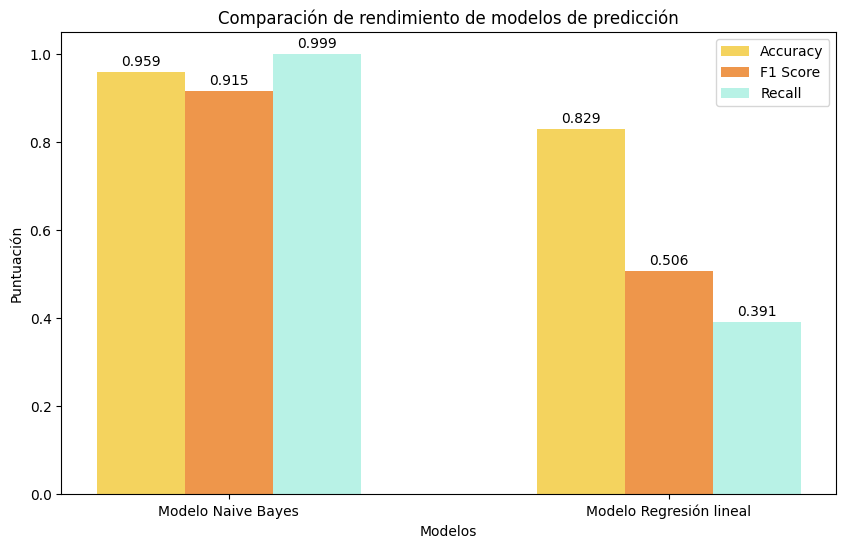

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Resultados de los modelos
model_names = ['Modelo Naive Bayes', 'Modelo Regresión lineal']
accuracy_scores = [0.9586483350328774, 0.8293540560497907]
f1_scores = [0.9153591478335972, 0.5059554107706403]
recall_scores = [0.9993713657079993, 0.39053905390539057]

# Configuración del gráfico
width = 0.2
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))
accuracy_bar = ax.bar(x - width, accuracy_scores, width, label='Accuracy', color='#F4D35E')
f1_bar = ax.bar(x, f1_scores, width, label='F1 Score', color='#EE964B')
recall_bar = ax.bar(x + width, recall_scores, width, label='Recall', color='#B8F2E6')

# Agregar etiquetas con porcentaje
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(accuracy_bar)
autolabel(f1_bar)
autolabel(recall_bar)

# Etiquetas y leyenda
ax.set_xlabel('Modelos')
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de rendimiento de modelos de predicción')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Mostrar el gráfico
plt.show()


## Comentarios comparativos



El primer modelo (Naive Bayes) muestra un mejor rendimiento en comparación con el segundo modelo (Regresión Lineal) en todas las métricas evaluadas (Accuracy, F1 score y Recall). Por lo tanto, el primer modelo es considerado como el mejor en términos de rendimiento.

Como equipo recomendamos utilizar el primer modelo, es decir, Naive Bayes, debido a su mayor precisión y rendimiento en las métricas de evaluación. Sin embargo, es importante tener en cuenta que cada modelo tiene sus propias fortalezas y debilidades, y la elección del modelo depende del contexto y los requisitos específicos del problema.

Posibles fallas del modelo seleccionado (Naive Bayes):

* Suposición de independencia de variables: Naive Bayes asume que todas las variables son independientes entre sí, lo cual puede no ser cierto en todos los casos. Si hay dependencias entre las variables, el modelo puede producir resultados inexactos.
* Sensibilidad a valores atípicos: Naive Bayes puede ser sensible a valores atípicos en los datos, lo que puede afectar la precisión de las predicciones.
* Suposición de distribución normal: En el caso de Naive Bayes, el modelo asume que las variables siguen una distribución normal. Si las variables no siguen esta distribución, el modelo puede generar predicciones incorrectas.

# Despliegue del mejor modelo

Durante este proceso realizaremos el despliegue del mejor modelo que aplicamos, pero con valores que no conoce, para esto vamos a crear un set datos nuevo para así confirmar si es que el modelo fue entrenado correctamente

In [61]:
columnas = [ "Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustDir",
            "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
            "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm",
            "RainToday", "RISK_MM","RainTomorrow"]

valores = [
    [ 1, 13.4, 22.9, 0.6, 0.0, 0.0, 1, 44.0, 18, 35, 20.0, 24.0, 71.0, 22.0, 1007.7, 1007.1, 8.0, 7.0, 16.9, 21.8, 0, 0.0, 0],
    [ 1, 7.4, 25.1, 0.0, 0.0, 0.0, 2, 44.0, 19, 36, 4.0, 22.0, 44.0, 25.0, 1010.6, 1007.8, 8.0, 7.0, 17.2, 24.3, 0, 0.0, 0],
    [ 1, 12.9, 25.7, 0.0, 0.0, 0.0, 3, 46.0, 18, 36, 19.0, 26.0, 38.0, 30.0, 1007.6, 1008.7, 8.0, 2.0, 21.0, 23.2, 0, 0.0, 0],
    [ 1, 9.2, 28.0, 0.0, 0.0, 0.0, 4, 24.0, 20, 37, 11.0, 9.0, 45.0, 16.0, 1017.6, 1012.8, 8.0, 7.0, 18.1, 26.5, 0, 1.0, 1],
    [ 1, 17.5, 32.3, 1.0, 0.0, 0.0, 1, 41.0, 21, 38, 7.0, 20.0, 82.0, 33.0, 1010.8, 1006.0, 7.0, 2.0, 17.8, 29.7, 0, 0.2, 0]
]


array_datos = []
array_datos.append(columnas)
for valores_fila in valores:
    array_datos.append(valores_fila)


Durante esta sección vamos a crear un dataset completamente nuevo para poder predecir si es que llueve mañana o no

In [62]:
import pandas as pd

# Cargar los datasets
dataset1 = pd.DataFrame(data)  # Suponiendo que 'data' es el primer dataset
dataset2 = pd.DataFrame(array_datos)  # Suponiendo que 'array_datos' es el segundo dataset

# Verificar si hay filas duplicadas en el segundo dataset
filas_duplicadas = dataset2.duplicated().any()

if filas_duplicadas:
    print("El segundo dataset contiene filas duplicadas.")
else:
    print("El segundo dataset no contiene filas duplicadas.")


El segundo dataset no contiene filas duplicadas.


También comprobaremos si es que los datos creados previamente no estén duplicados o existan valores en relación con los datos que usamos para entrenar la data, en este caso nos indica que no hay filas duplicadas en nuestro nuevo set de datos.

In [63]:
import pandas as pd
import joblib

# Cargar el modelo entrenado desde el archivo
naive_bayes_model = joblib.load('naive_bayes_model.pkl')

# Crear un DataFrame a partir de los datos de prueba
df_prueba = pd.DataFrame(array_datos[1:], columns=array_datos[0])

# Obtener la columna objetivo y las características del DataFrame de prueba

features_prueba = df_prueba.drop(['RainTomorrow'], axis=1)

# Predecir las etiquetas usando el modelo
predicted_labels = naive_bayes_model.predict(features_prueba)

# Imprimir la predicción
for label in predicted_labels:
    if label == 0:
        print("Mañana no llueve")
    else:
        print("Mañana llueve")



Mañana no llueve
Mañana no llueve
Mañana no llueve
Mañana no llueve
Mañana no llueve


Por último realizamos la predicción con nuestro modelo ya entrenado y con el nuevo set de datos que no conoce, lo, cuál nos entrega que en las cinco filas que tiene nuestra data logra predecir que en todas no llueve mañana

# Conclusiones finales del trabajo realizado

1. Generalización del modelo: Un modelo de aprendizaje automático entrenado en un conjunto de datos específico puede tener un buen desempeño en ese conjunto de datos, pero su rendimiento puede variar en nuevos conjuntos de datos. Esto se debe a que el modelo puede haber aprendido características específicas o patrones que son relevantes en el conjunto de entrenamiento, pero que pueden no ser tan relevantes en otros conjuntos de datos. Por lo tanto, es importante evaluar el modelo en diferentes conjuntos de datos para tener una idea de su capacidad para generalizar y funcionar bien en casos más generales.

2. Sobre ajuste (overfitting): El sobre ajuste ocurre cuando un modelo se ajusta demasiado a los detalles y el ruido en el conjunto de entrenamiento, en lugar de capturar los patrones subyacentes. Esto puede llevar a un rendimiento deficiente en nuevos conjuntos de datos. Al evaluar el modelo en diferentes conjuntos de datos, se puede identificar si el modelo ha sido afectado por el sobre ajuste y si su rendimiento se mantiene sólido en diferentes casos.

3. Variabilidad de los datos: Los datos reales pueden ser inherentemente variables debido a diversas fuentes, como la naturaleza cambiante de los fenómenos que se están modelando, la recopilación de datos imperfecta o los errores aleatorios. Esta variabilidad puede influir en los resultados y en las métricas de evaluación. Por lo tanto, es importante considerar diferentes conjuntos de datos y realizar evaluaciones adicionales para obtener una imagen más completa y robusta del desempeño del modelo.

4. Métricas complementarias: Si bien el accuracy, el F1-score y el recall son métricas útiles para evaluar el rendimiento de un modelo, no proporcionan una imagen completa por sí solas. Otras métricas como la precisión, la especificidad, la matriz de confusión, las curvas ROC, entre otras, pueden brindar información adicional sobre el rendimiento del modelo en diferentes aspectos. Al considerar múltiples métricas, se puede obtener una evaluación más completa y precisa del modelo.

En resumen, es relevante tener en cuenta la variabilidad de los resultados en diferentes conjuntos de datos y ejecutar evaluaciones adicionales con diferentes métricas para obtener una imagen más completa del desempeño del modelo. Esto ayuda a comprender mejor las fortalezas y debilidades del modelo, a identificar posibles problemas de sobre ajuste y a evaluar su capacidad de generalización en diferentes escenarios.